# <h1 align="center"> <font color='royalblue'><font size=6>Delhivery - Business Case Study :</font> </font></h1>
<h1 align='center'><font color='royalblue'><font size=6>Feature Engineering</font> </font></h1>
<h2 align='right'>- <font color='green'><b> Vijay Kumar</b></font></h2>

### **Introduction:**

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities

### **Why the case study??**

* Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.
* It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.
* First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.
* Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.
* Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.
* By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.

###**Business Target**

The company wants to understand and process the data coming out of data engineering pipelines:

- Clean, sanitize and manipulate data to get useful features out of raw fields

- Make sense out of the raw data and help the data science team to build forecasting models on it.

### **Features of the dataset**

-------------------------------------------------------------------------------


  *Column Profiling:*

-------------------------------------------------------------------------------


| Feature | Description |
|:--------|:------------|
|data| tells whether the data is testing or training data|
|trip_creation_time| Timestamp of trip creation|
|route_schedule_uuid| Unique ID for a particular route schedule|
|**route_type**| **Transportation type**|
|a. FTL–Full Truck Load| FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way|
|b. Carting | Handling system consisting of small vehicles (carts)|
|trip_uuid| Unique ID given to a particular trip (A trip may include different source and destination centers)|
|source_center| Source ID of trip origin |
|source_name| Source Name of trip origin |
|destination_center| Destination ID |
|destination_name| Destination Name |
|od_start_time| Trip start time |
|od_end_time| Trip end time |
|start_scan_to_end_scan | Time taken to deliver from source to destination |
|is_cutoff | Unknown field |
|cutoff_factor | Unknown field|
|cutoff_timestamp | Unknown field|
|actual_distance_to_destination | Distance in kms between source and destination warehouse|
|actual_time | Actual time taken to complete the delivery (Cumulative) |
|osrm_time | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
|osrm_distance | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
|factor | Unknown field |
| segment_actual_time | This is a segment time. Time taken by the subset of the package delivery|
|segment_osrm_time | This is the OSRM segment time. Time taken by the subset of the package delivery|
| segment_osrm_distance | This is the OSRM distance. Distance covered by subset of the package delivery|
| segment_factor | Unknown field |

In [ ]:
#Importing required packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon,shapiro,levene,norm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
import statsmodels.api as sm
import warnings
from sklearn.impute import SimpleImputer
!pip install category_encoders
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')


In [ ]:
#importing and reading data
data=pd.read_csv('/content/delhivery_data.csv')

In [ ]:
data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

### **Basic Data Cleaning & Exploration**

In [ ]:
data.shape

(144867, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
data.drop(columns={'is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'},axis=1,inplace=True)

In [ ]:
data.describe().T

count        mean          std         min  \
start_scan_to_end_scan          144867.0  961.262986  1037.012769   20.000000   
actual_distance_to_destination  144867.0  234.073372   344.990009    9.000045   
actual_time                     144867.0  416.927527   598.103621    9.000000   
osrm_time                       144867.0  213.868272   308.011085    6.000000   
osrm_distance                   144867.0  284.771297   421.119294    9.008200   
segment_actual_time             144867.0   36.196111    53.571158 -244.000000   
segment_osrm_time               144867.0   18.507548    14.775960    0.000000   
segment_osrm_distance           144867.0   22.829020    17.860660    0.000000   

                                       25%         50%          75%  \
start_scan_to_end_scan          161.000000  449.000000  1634.000000   
actual_distance_to_destination   23.355874   66.126571   286.708875   
actual_time                      51.000000  132.000000   513.000000   
osrm_time                        27.000000   64.000000   257.000000   
osrm_distance                    29.914700   78.525800   343.193250   
segment_actual_time              20.000000   29.000000    40.000000   
segment_osrm_time                11.000000   17.000000    22.000000   
segment_osrm_distance            12.070100   23.513000    27.813250   

                                        max  
start_scan_to_end_scan          7898.000000  
actual_distance_to_destination  1927.447705  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199100  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403700

In [ ]:
data.describe(include='object').T

count unique  \
data                 144867      2   
trip_creation_time   144867  14817   
route_schedule_uuid  144867   1504   
route_type           144867      2   
trip_uuid            144867  14817   
source_center        144867   1508   
source_name          144574   1498   
destination_center   144867   1481   
destination_name     144606   1468   
od_start_time        144867  26369   
od_end_time          144867  26369   

                                                                   top    freq  
data                                                          training  104858  
trip_creation_time                          2018-09-28 05:23:15.359220     101  
route_schedule_uuid  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...    1812  
route_type                                                         FTL   99660  
trip_uuid                                      trip-153811219535896559     101  
source_center                                             IND000000ACB   23347  
source_name                              Gurgaon_Bilaspur_HB (Haryana)   23347  
destination_center                                        IND000000ACB   15192  
destination_name                         Gurgaon_Bilaspur_HB (Haryana)   15192  
od_start_time                               2018-09-21 18:37:09.322207      81  
od_end_time                                 2018-09-24 09:59:15.691618      81

In [ ]:
round(data.isnull().sum()/data.shape[0]*100,2)

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
dtype: float64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.astype({'trip_creation_time':'datetime64[ns]','od_start_time':'datetime64[ns]', 'od_end_time':'datetime64[ns]','route_type':'category','data':'category'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653                 14.0               11.0   
1       20.0        21.7243                 10.0                9.0   
2       28.0        32.5395                 16.0                7.0   
3       40.0        45.5620                 21.0               12.0   
4       44.0        54.2181                  6.0                5.0   

   segment_osrm_distance  
0                11.9653  
1                 9.7590  
2                10.8152  
3                13.0224  
4                 3.9153

In [ ]:
data['Trip_creation_month']=data['trip_creation_time'].dt.month
data['Trip_creation_day']=data['trip_creation_time'].dt.day
data['Trip_creation_hour']=data['trip_creation_time'].dt.hour
data['Trip_creation_weekday']=data['trip_creation_time'].dt.day_name()
data['Trip_creation_year']=data['trip_creation_time'].dt.year
data['Trip_creation_month']=data['Trip_creation_month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [ ]:
str(data['trip_creation_time'].dt.month.min())+'/'+str(data['trip_creation_time'].dt.year.min())+'--'+str(data['trip_creation_time'].dt.month.max())+'/'+str(data['trip_creation_time'].dt.year.max())

'9/2018--10/2018'

In the above steps we converted data types of:

* Routes--> Category
* Data--> Category
* Trip Creation Time--> Date Time



We have further divided the date time column into 5 different columns to drill down the trip creation data till the hour granularity.



#### **Insights**

From the above initial analysis of the data we have found that :

* There are a total `144867` rows of data.
* We eliminate `5` out of the initial `24` columns for lack of clear information about them.
* There are `no dupliactes` in the data.
* No of rows with `missing` or `null values` is very negligable in comparision with the size of dataset, hence we drop those respective rows of data and we are left with `144316` rows of data.
* Given data is of the time period `September,2018` to `October,2018`

### Visual Analysis

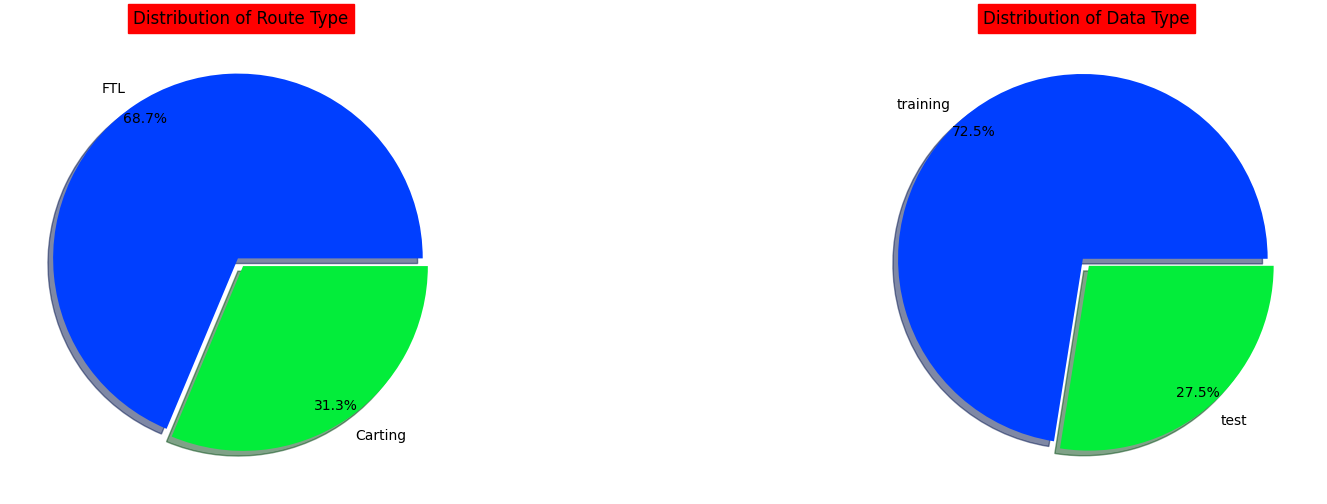

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.pie(data['route_type'].value_counts(),labels=data['route_type'].value_counts().index,autopct='%1.1f%%',explode=(0.03,0.02), pctdistance=0.905,shadow=True,radius=1)
plt.title('Distribution of Route Type',backgroundcolor='red')

plt.subplot(1,2,2)
plt.pie(data['data'].value_counts(),labels=data['data'].value_counts().index,autopct='%1.1f%%',explode=(0.03,0.02), pctdistance=0.905,shadow=True,radius=1)
plt.title('Distribution of Data Type',backgroundcolor='red')

plt.subplots_adjust(hspace=0.5)



plt.show()

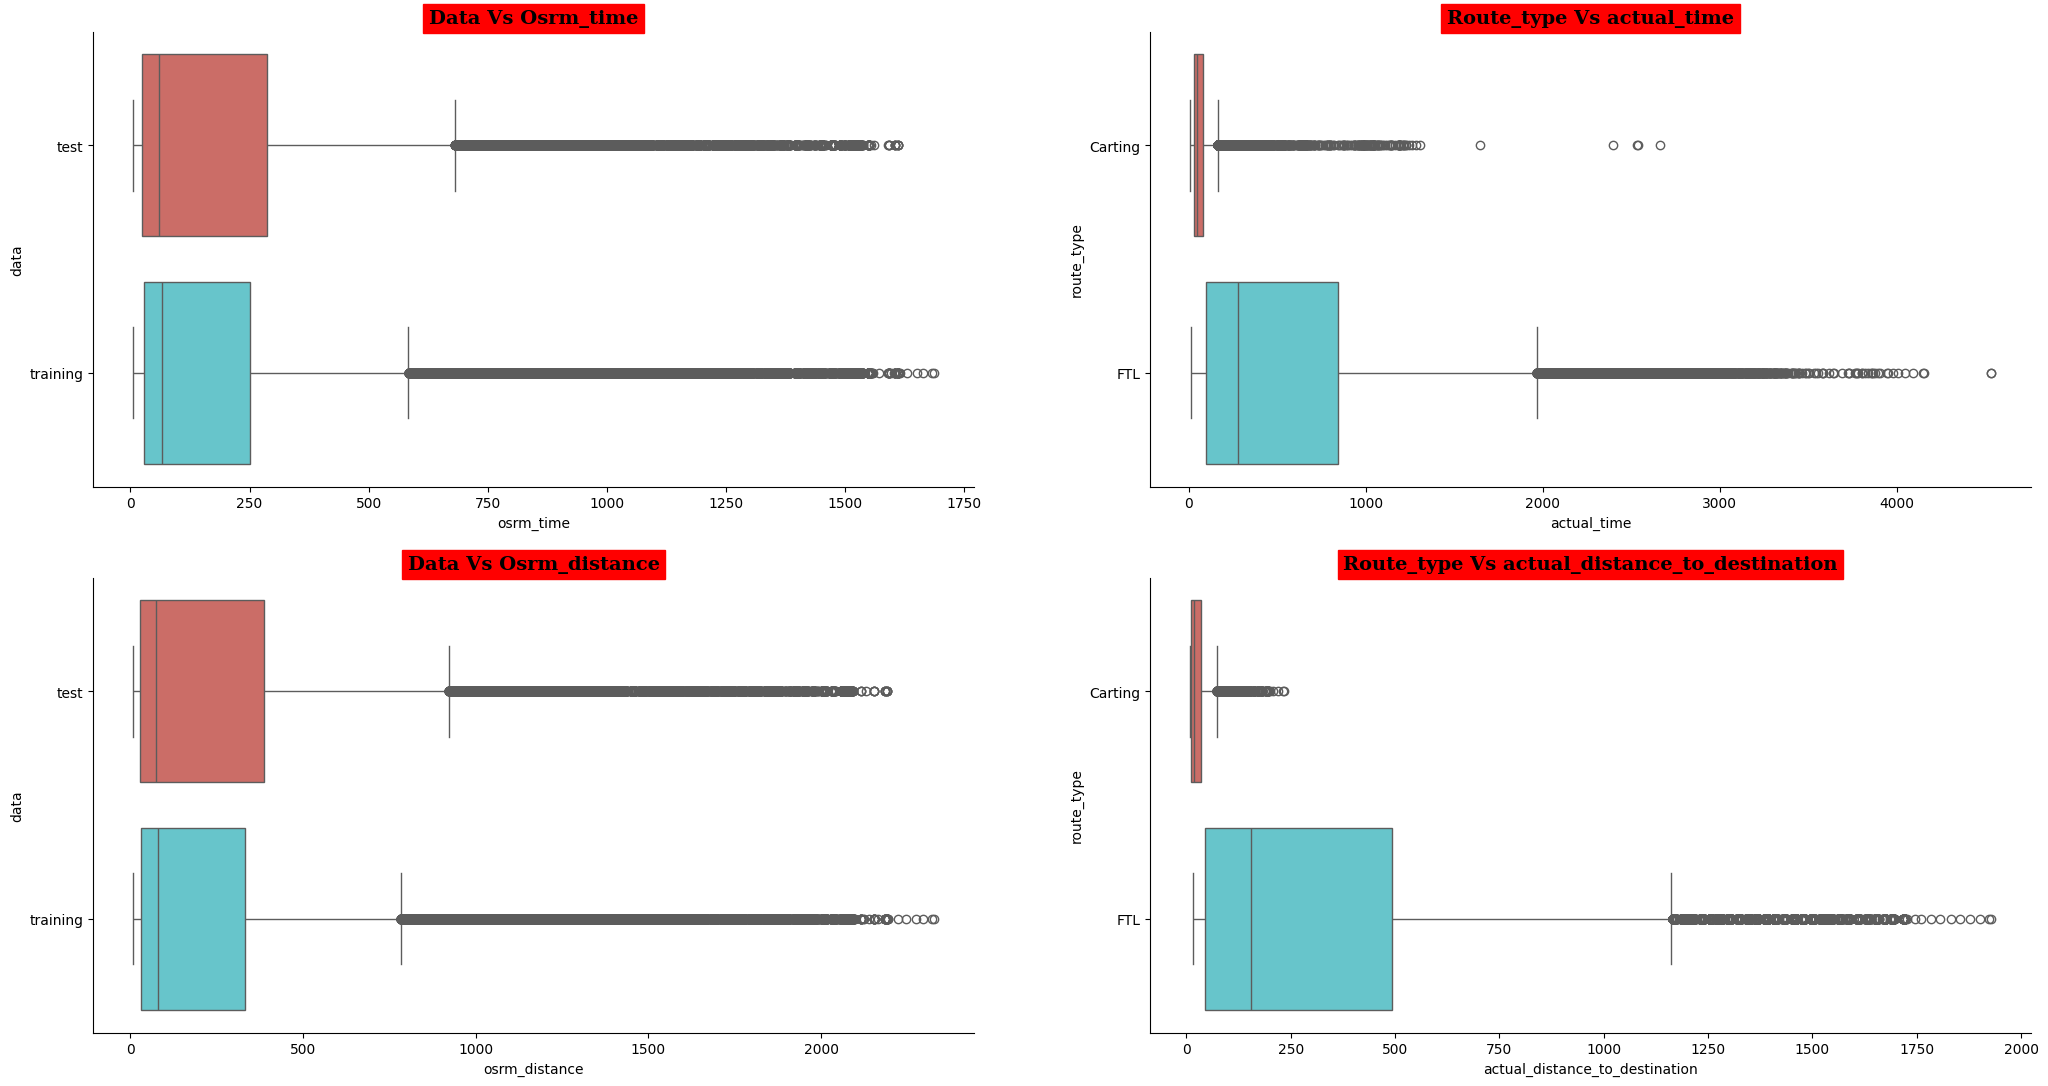

In [ ]:
plt.figure(figsize=(25,13))
plt.style.use('default')
plt.style.use('seaborn-bright')
cp=sns.color_palette("hls", 2)
plt.subplot(2,2,1)
sns.boxplot(data=data,y='data',x='osrm_time',palette=cp)
plt.title('Data Vs Osrm_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='red')

plt.subplot(222)
sns.boxplot(data=data,y='route_type',x='actual_time',palette=cp)
plt.title('Route_type Vs actual_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='red')

plt.subplot(223)
sns.boxplot(data=data,y='data',x='osrm_distance',palette=cp)
plt.title('Data Vs Osrm_distance',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='red')

plt.subplot(224)
sns.boxplot(data=data,y='route_type',x='actual_distance_to_destination',palette=cp)
plt.title('Route_type Vs actual_distance_to_destination',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='red')
sns.despine()
plt.show()

#### **Insights**

- Both training and test data have the same range of osrm time recorded
- FTL route type has more actual time compared to Carting.
- Both training and test data have the same range of osrm distance recorded
- FTL route type has more actual distance compared to Carting.

The increase in the time and distance on FTL data points could be explained by the 70% of FTL routing data in our dataset.



### **Merging and Aggregation of Rows**



In [ ]:
df1=data.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [ ]:
df1.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ... osrm_time  osrm_distance  \
0 2018-09-20 03:21:32.418600  ...      11.0        11.9653   
1 2018-09-20 03:21:32.418600  ...      20.0        21.7243   
2 2018-09-20 03:21:32.418600  ...      28.0        32.5395   
3 2018-09-20 03:21:32.418600  ...      40.0        45.5620   
4 2018-09-20 03:21:32.418600  ...      44.0        54.2181   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 14.0               11.0                11.9653   
1                 10.0                9.0                 9.7590   
2                 16.0                7.0                10.8152   
3                 21.0               12.0                13.0224   
4                  6.0                5.0                 3.9153   

   Trip_creation_month  Trip_creation_day  Trip_creation_hour  \
0                  Sep                 20                   2   
1                  Sep                 20                   2   
2                  Sep                 20                   2   
3                  Sep                 20                   2   
4                  Sep                 20                   2   

   Trip_creation_weekday Trip_creation_year  
0               Thursday               2018  
1               Thursday               2018  
2               Thursday               2018  
3               Thursday               2018  
4               Thursday               2018  

[5 rows x 24 columns]

#### Grouping by segment

In [ ]:
#creating unique identifier for each segment of a trip

In [ ]:
df1['segment_key']=df1['trip_uuid']+'+'+df1['source_center']+'+'+df1['destination_center']

In [ ]:
#Merging of rows

In [ ]:
segment_cols=['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

In [ ]:
for col in segment_cols:
  df1[col+'_sum']=df1.groupby('segment_key')[col].cumsum()

In [ ]:
df1[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

segment_key  \
0       trip-153741093647649320+IND388121AAA+IND388620AAB   
1       trip-153741093647649320+IND388121AAA+IND388620AAB   
2       trip-153741093647649320+IND388121AAA+IND388620AAB   
3       trip-153741093647649320+IND388121AAA+IND388620AAB   
4       trip-153741093647649320+IND388121AAA+IND388620AAB   
...                                                   ...   
144862  trip-153746066843555182+IND131028AAB+IND000000ACB   
144863  trip-153746066843555182+IND131028AAB+IND000000ACB   
144864  trip-153746066843555182+IND131028AAB+IND000000ACB   
144865  trip-153746066843555182+IND131028AAB+IND000000ACB   
144866  trip-153746066843555182+IND131028AAB+IND000000ACB   

        segment_actual_time  segment_actual_time_sum  segment_osrm_distance  \
0                      14.0                     14.0                11.9653   
1                      10.0                     24.0                 9.7590   
2                      16.0                     40.0                10.8152   
3                      21.0                     61.0                13.0224   
4                       6.0                     67.0                 3.9153   
...                     ...                      ...                    ...   
144862                 12.0                     92.0                 8.1858   
144863                 26.0                    118.0                17.3725   
144864                 20.0                    138.0                20.7053   
144865                 17.0                    155.0                18.8885   
144866                268.0                    423.0                 8.8088   

        segment_osrm_distance_sum  segment_osrm_time  segment_osrm_time_sum  
0                         11.9653               11.0                   11.0  
1                         21.7243                9.0                   20.0  
2                         32.5395                7.0                   27.0  
3                         45.5619               12.0                   39.0  
4                         49.4772                5.0                   44.0  
...                           ...                ...                    ...  
144862                    65.3487               12.0                   94.0  
144863                    82.7212               21.0                  115.0  
144864                   103.4265               34.0                  149.0  
144865                   122.3150               27.0                  176.0  
144866                   131.1238                9.0                  185.0  

[144316 rows x 7 columns]

#### Aggregating at segment level

In [ ]:
#Creating a dictionary for aggregation at segment level

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'Trip_creation_month' : 'first',
  'Trip_creation_day' : 'first',
  'Trip_creation_hour' : 'first',
  'Trip_creation_year' : 'first',
  'Trip_creation_weekday' : 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}



In [ ]:
# Grouping by segment_key and aggregating
segment_agg_df = df1.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_df = segment_agg_df.sort_values(by=['segment_key','od_end_time'])
segment_agg_df

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time Trip_creation_month  Trip_creation_day  \
0     2018-09-12 00:00:16.535741                 Sep                 12   
1     2018-09-12 00:00:16.535741                 Sep                 12   
2     2018-09-12 00:00:22.886430                 Sep                 12   
3     2018-09-12 00:00:22.886430                 Sep                 12   
4     2018-09-12 00:00:33.691250                 Sep                 12   
...                          ...                 ...                ...   
26217 2018-10-03 23:59:14.390954                 Oct                  3   
26218 2018-10-03 23:59:14.390954                 Oct                  3   
26219 2018-10-03 23:59:14.390954                 Oct                  3   
26220 2018-10-03 23:59:42.701692                 Oct                  3   
26221 2018-10-03 23:59:42.701692                 Oct                  3   

       Trip_creation_hour  Trip_creation_year Trip_creation_weekday  ...  \
0                       0                2018             Wednesday  ...   
1                       0                2018             Wednesday  ...   
2                       0                2018             Wednesday  ...   
3                       0                2018             Wednesday  ...   
4                       0                2018             Wednesday  ...   
...                   ...                 ...                   ...  ...   
26217                  23                2018             Wednesday  ...   
26218                  23                2018             Wednesday  ...   
26219                  23                2018             Wednesday  ...   
26220                  23                2018             Wednesday  ...   
26221                  23                2018             Wednesday  ...   

      actual_distance_to_destination actual_time osrm_time osrm_distance  \
0                         383.759164       732.0     329.0      446.5496   
1                         440.973689       830.0     388.0      544.8027   
2                          24.644021        47.0      26.0       28.1994   
3                          48.542890        96.0      42.0       56.9116   
4                         237.439610       611.0     212.0      281.2109   
...                              ...         ...       ...           ...   
26217                      33.627182        51.0      41.0       42.5213   
26218                      33.673835        90.0      48.0       40.6080   
26219                      12.661945        30.0      14.0       16.0185   
26220                      40.546740       233.0      42.0       52.5303   
26221        

In [ ]:
segment_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   trip_uuid                       26222 non-null  object        
 2   data                            26222 non-null  category      
 3   route_type                      26222 non-null  category      
 4   trip_creation_time              26222 non-null  datetime64[ns]
 5   Trip_creation_month             26222 non-null  object        
 6   Trip_creation_day               26222 non-null  int32         
 7   Trip_creation_hour              26222 non-null  int32         
 8   Trip_creation_year              26222 non-null  int32         
 9   Trip_creation_weekday           26222 non-null  object        
 10  source_name                     26222 non-null  object        
 11  de

#### **Inference**

- The rows have been merged based on the unique segment_key, which is a combination of trip_uuid, source_center, and destination_center.

- The aggregated dataset reflects the total values for each segment of the trip.
-
We have `26222` rows of data after grouping the data by segment keys and aggregating at segment level



### **Feature Engineering**

In [ ]:
#creating new column to measure the total time taken on a trip
segment_agg_df['od_time_diff_hour']=round((segment_agg_df['od_end_time']-segment_agg_df['od_start_time']).dt.total_seconds()/3600,2)

In [ ]:
segment_agg_df

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time Trip_creation_month  Trip_creation_day  \
0     2018-09-12 00:00:16.535741                 Sep                 12   
1     2018-09-12 00:00:16.535741                 Sep                 12   
2     2018-09-12 00:00:22.886430                 Sep                 12   
3     2018-09-12 00:00:22.886430                 Sep                 12   
4     2018-09-12 00:00:33.691250                 Sep                 12   
...                          ...                 ...                ...   
26217 2018-10-03 23:59:14.390954                 Oct                  3   
26218 2018-10-03 23:59:14.390954                 Oct                  3   
26219 2018-10-03 23:59:14.390954                 Oct                  3   
26220 2018-10-03 23:59:42.701692                 Oct                  3   
26221 2018-10-03 23:59:42.701692                 Oct                  3   

       Trip_creation_hour  Trip_creation_year Trip_creation_weekday  ...  \
0                       0                2018             Wednesday  ...   
1                       0                2018             Wednesday  ...   
2                       0                2018             Wednesday  ...   
3                       0                2018             Wednesday  ...   
4                       0                2018             Wednesday  ...   
...                   ...                 ...                   ...  ...   
26217                  23                2018             Wednesday  ...   
26218                  23                2018             Wednesday  ...   
26219                  23                2018             Wednesday  ...   
26220                  23                2018             Wednesday  ...   
26221                  23                2018             Wednesday  ...   

      actual_time osrm_time osrm_distance segment_actual_time  \
0           732.0     329.0      446.5496               728.0   
1           830.0     388.0      544.8027               820.0   
2            47.0      26.0       28.1994                46.0   
3            96.0      42.0       56.9116                95.0   
4           611.0     212.0      281.2109               608.0   
...           ...       ...           ...                 ...   
26217        51.0      41.0       42.5213                49.0   
26218        90.0      48.0       40.6080                89.0   
26219        30.0      14.0       16.0185                29.0   
26220       233.0      42.0       52.5303               233.0   
26221        42.0      26.0       28.0484                41.0   

       segment_osrm_time  segment_osrm_distance  segment_actual_time

In [ ]:
segment_agg_df2=segment_agg_df.copy()

In [ ]:
#using regex to split source and destination data
def extract_data(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None

In [ ]:
segment_agg_df2[['source_city','source_place','source_state']] = segment_agg_df2['source_name'].apply(lambda x: pd.Series(extract_data(x)))

In [ ]:
segment_agg_df2[['destination_city','destination_place','destination_state']] = segment_agg_df2['destination_name'].apply(lambda x: pd.Series(extract_data(x)))

In [ ]:
segment_agg_df2['Src_to_Dest_Corridor']=segment_agg_df2['source_name']+'<--->'+segment_agg_df2['destination_name']
segment_agg_df2['State_corridor']=segment_agg_df2['source_state']+'_'+segment_agg_df2['source_city']+'<--->'+segment_agg_df2['destination_state']+'_'+segment_agg_df2['destination_city']
segment_agg_df2['City_corridor']=segment_agg_df2['source_city']+'_'+segment_agg_df2['source_place']+'<--->'+segment_agg_df2['destination_city']+'_'+segment_agg_df2['destination_place']

In [ ]:
segment_agg_df2.head()

segment_key                trip_uuid  \
0  trip-153671041653548748+IND209304AAA+IND000000ACB  trip-153671041653548748   
1  trip-153671041653548748+IND462022AAA+IND209304AAA  trip-153671041653548748   
2  trip-153671042288605164+IND561203AAB+IND562101AAA  trip-153671042288605164   
3  trip-153671042288605164+IND572101AAA+IND561203AAB  trip-153671042288605164   
4  trip-153671043369099517+IND000000ACB+IND160002AAC  trip-153671043369099517   

       data route_type         trip_creation_time Trip_creation_month  \
0  training        FTL 2018-09-12 00:00:16.535741                 Sep   
1  training        FTL 2018-09-12 00:00:16.535741                 Sep   
2  training    Carting 2018-09-12 00:00:22.886430                 Sep   
3  training    Carting 2018-09-12 00:00:22.886430                 Sep   
4  training        FTL 2018-09-12 00:00:33.691250                 Sep   

   Trip_creation_day  Trip_creation_hour  Trip_creation_year  \
0                 12                   0                2018   
1                 12                   0                2018   
2                 12                   0                2018   
3                 12                   0                2018   
4                 12                   0                2018   

  Trip_creation_weekday  ... od_time_diff_hour source_city source_place  \
0             Wednesday  ...             21.01      Kanpur  Central_H_6   
1             Wednesday  ...             16.66      Bhopal   Trnsport_H   
2             Wednesday  ...              0.98  Doddablpur   ChikaDPP_D   
3             Wednesday  ...              2.05      Tumkur   Veersagr_I   
4             Wednesday  ...             13.91     Gurgaon  Bilaspur_HB   

     source_state  destination_city  destination_place  destination_state  \
0   Uttar Pradesh           Gurgaon        Bilaspur_HB            Haryana   
1  Madhya Pradesh            Kanpur        Central_H_6      Uttar Pradesh   
2       Karnataka        Chikblapur         ShntiSgr_D          Karnataka   
3       Karnataka        Doddablpur         ChikaDPP_D          Karnataka   
4         Haryana        Chandigarh         Mehmdpur_H             Punjab   

                                Src_to_Dest_Corridor  \
0  Kanpur_Central_H_6 (Uttar Pradesh)<--->Gurgaon...   
1  Bhopal_Trnsport_H (Madhya Pradesh)<--->Kanpur_...   
2  Doddablpur_ChikaDPP_D (Karnataka)<--->Chikblap...   
3  Tumkur_Veersagr_I (Karnataka)<--->Doddablpur_C...   
4  Gurgaon_Bilaspur_HB (Haryana)<--->Chandigarh_M...   

                                   State_corridor  \
0        Uttar Pradesh_Kanpur<--->Haryana_Gurgaon   
1  Madhya Pradesh_Bhopal<--->Uttar Pradesh_Kanpur   
2   Karnataka_Doddablpur<--->Karnataka_Chikblapur   
3       Karnataka_Tumkur<--->Karnataka_Doddablpur   
4           Haryana_Gurgaon<--->Punjab_Chandigarh   

                                     City_corridor  
0       Kanpur_Central_H_6<--->Gurgaon_Bilaspur_HB  
1         Bhopal_Trnsport_H<--->Kanpur_Central_H_6  
2  Doddablpur_ChikaDPP_D<--->Chikblapur_ShntiSgr_D  
3      Tumkur_Veersagr_I<--->Doddablpur_ChikaDPP_D  
4    Gurgaon_Bilaspur_HB<--->Chandigarh_Mehmdpur_H  

[5 rows x 35 columns]

In [ ]:
segment_agg_df2.describe().T

count                           mean  \
trip_creation_time                26222  2018-09-22 13:58:56.740969728   
Trip_creation_day               26222.0                      18.400351   
Trip_creation_hour              26222.0                      12.880749   
Trip_creation_year              26222.0                         2018.0   
od_start_time                     26222  2018-09-22 17:49:54.012840448   
od_end_time                       26222  2018-09-22 22:49:00.449498112   
start_scan_to_end_scan          26222.0                      298.55339   
actual_distance_to_destination  26222.0                      92.533054   
actual_time                     26222.0                     200.926588   
osrm_time                       26222.0                      90.785333   
osrm_distance                   26222.0                     114.975332   
segment_actual_time             26222.0                     199.095645   
segment_osrm_time               26222.0                     101.793341   
segment_osrm_distance           26222.0                      125.58713   
segment_actual_time_sum         26222.0                     199.095645   
segment_osrm_time_sum           26222.0                     101.793341   
segment_osrm_distance_sum       26222.0                      125.58713   
od_time_diff_hour               26222.0                       4.985114   

                                                       min  \
trip_creation_time              2018-09-12 00:00:16.535741   
Trip_creation_day                                      1.0   
Trip_creation_hour                                     0.0   
Trip_creation_year                                  2018.0   
od_start_time                   2018-09-12 00:00:16.535741   
od_end_time                     2018-09-12 00:50:10.814399   
start_scan_to_end_scan                                20.0   
actual_distance_to_destination                    9.001351   
actual_time                                            9.0   
osrm_time                                              6.0   
osrm_distance                                       9.0729   
segment_actual_time                                    9.0   
segment_osrm_time                                      6.0   
segment_osrm_distance                               9.0729   
segment_actual_time_sum                                9.0   
segment_osrm_time_sum                                  6.0   
segment_osrm_distance_sum                           9.0729   
od_time_diff_hour                                     0.35   

                                                          25%  \
trip_creation_time              2018-09-17 03:57:50.900417024   
Trip_creation_day                                        14.0   
Trip_creation_hour                                        4.0   
Trip_creation_year                                     2018.0   
od_start_time                   2018-09-17 07:43:36.525784320   
od_end_time                     2018-09-17 15:10:35.615369472   
start_scan_to_end_scan                                   90.0   
actual_distance_to_destination                      21.654149   
actual_time                                              51.0   
osrm_time                                                25.0   
osrm_distance                                        27.71915   
segment_actual_time                                      50.0   
segment_osrm_time                                        25.0   
segment_osrm_distance                                 28.4291   
segment_actual_time_sum                                  50.0   
segment_osrm_time_sum                                    25.0   
segment_osrm_distance_sum                             28.4291   
od_time_diff_hour                                        1.52   

                                                          50%  \
trip_creation_time              2018-09-22 03:33:30.255023104   
Trip_creation_day                                        19.0   
Trip_creation_hou

In [ ]:
segment_agg_df2.describe(include='object').T

count unique  \
segment_key            26222  26222   
trip_uuid              26222  14787   
Trip_creation_month    26222      2   
Trip_creation_weekday  26222      7   
source_name            26222   1496   
destination_name       26222   1466   
source_city            26222   1240   
source_place           26222   1218   
source_state           26222     31   
destination_city       26222   1237   
destination_place      26222   1189   
destination_state      26222     32   
Src_to_Dest_Corridor   26222   2741   
State_corridor         26222   2316   
City_corridor          26222   2741   

                                                                     top  \
segment_key            trip-153671041653548748+IND209304AAA+IND000000ACB   
trip_uuid                                        trip-153717306559016761   
Trip_creation_month                                                  Sep   
Trip_creation_weekday                                          Wednesday   
source_name                                Gurgaon_Bilaspur_HB (Haryana)   
destination_name                           Gurgaon_Bilaspur_HB (Haryana)   
source_city                                                    Bengaluru   
source_place                                                 Bilaspur_HB   
source_state                                                 Maharashtra   
destination_city                                                  Mumbai   
destination_place                                            Bilaspur_HB   
destination_state                                              Karnataka   
Src_to_Dest_Corridor   Bangalore_Nelmngla_H (Karnataka)<--->Bengaluru...   
State_corridor                 Maharashtra_Mumbai<--->Maharashtra_Mumbai   
City_corridor             Bangalore_Nelmngla_H<--->Bengaluru_KGAirprt_HB   

                        freq  
segment_key                1  
trip_uuid                  8  
Trip_creation_month    23054  
Trip_creation_weekday   4819  
source_name             1052  
destination_name         928  
source_city             1136  
source_place            1052  
source_state            3565  
destination_city        1236  
destination_place        928  
destination_state       3497  
Src_to_Dest_Corridor     151  
State_corridor           622  
City_corridor            151

#### Insights & Inferences


- We have created multiple new columns/features using existing columns:

    *  We used Source and Destination names to split and create 3 new columns from each of them.
    * Using the split we columns we also created multiple corridors between states, cities and places of Source and Destination.
    * We have created a new column to calculate total time taken on a trip.

### In-depth Analysis

In [ ]:
trip_agg_df=segment_agg_df2.copy()

In [ ]:
trip_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   trip_uuid                       26222 non-null  object        
 2   data                            26222 non-null  category      
 3   route_type                      26222 non-null  category      
 4   trip_creation_time              26222 non-null  datetime64[ns]
 5   Trip_creation_month             26222 non-null  object        
 6   Trip_creation_day               26222 non-null  int32         
 7   Trip_creation_hour              26222 non-null  int32         
 8   Trip_creation_year              26222 non-null  int32         
 9   Trip_creation_weekday           26222 non-null  object        
 10  source_name                     26222 non-null  object        
 11  de

#### Grouping and Aggregating at Trip-level

In [ ]:
#Creating a dictionary to group the data by trip_uuid
trip_dict = {
  'data' : 'first',
  'route_type' : 'first',
  'od_start_time':'first',
  'od_end_time':'last',
  'od_time_diff_hour' : 'sum',
  'trip_creation_time' : 'first',
  'Trip_creation_month' : 'first',
  'Trip_creation_day' : 'first',
  'Trip_creation_hour' : 'first',
  'Trip_creation_year' : 'first',
  'Trip_creation_weekday' : 'first',
  'start_scan_to_end_scan' : 'sum',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time': 'sum',
  'segment_osrm_time': 'sum',
  'segment_osrm_distance': 'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  'source_name': 'first',
  'source_city':'first',
  'source_state':'first',
  'source_place':'first',
  'destination_name': 'first',
  'destination_city':'first',
  'destination_state':'first',
  'destination_place':'first',
  'Src_to_Dest_Corridor':'first',
  'State_corridor':'first',
  'City_corridor':'first'

  }

In [ ]:
#grouping the data by trip_uuid
trip_agg_df = trip_agg_df.groupby('trip_uuid').agg(trip_dict).reset_index()
trip_agg_df

trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671042288605164  training    Carting   
2      trip-153671043369099517  training        FTL   
3      trip-153671046011330457  training    Carting   
4      trip-153671052974046625  training        FTL   
...                        ...       ...        ...   
14782  trip-153861095625827784      test    Carting   
14783  trip-153861104386292051      test    Carting   
14784  trip-153861106442901555      test    Carting   
14785  trip-153861115439069069      test    Carting   
14786  trip-153861118270144424      test        FTL   

                   od_start_time                od_end_time  \
0     2018-09-12 16:39:46.858469 2018-09-12 16:39:46.858469   
1     2018-09-12 02:03:09.655591 2018-09-12 02:03:09.655591   
2     2018-09-14 03:40:17.106733 2018-09-14 03:40:17.106733   
3     2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4     2018-09-12 00:02:09.740725 2018-09-12 03:54:43.114421   
...                          ...                        ...   
14782 2018-10-03 23:55:56.258533 2018-10-04 06:41:25.409035   
14783 2018-10-03 23:57:23.863155 2018-10-04 00:57:59.294434   
14784 2018-10-04 02:51:27.075797 2018-10-04 02:51:27.075797   
14785 2018-10-03 23:59:14.390954 2018-10-04 02:29:04.272194   
14786 2018-10-04 03:58:40.726547 2018-10-04 03:58:40.726547   

       od_time_diff_hour         trip_creation_time Trip_creation_month  \
0                  37.67 2018-09-12 00:00:16.535741                 Sep   
1                   3.03 2018-09-12 00:00:22.886430                 Sep   
2                  65.57 2018-09-12 00:00:33.691250                 Sep   
3                   1.67 2018-09-12 00:01:00.113710                 Sep   
4                  11.97 2018-09-12 00:02:09.740725                 Sep   
...                  ...                        ...                 ...   
14782               4.30 2018-10-03 23:55:56.258533                 Oct   
14783               1.01 2018-10-03 23:57:23.863155                 Oct   
14784               7.04 2018-10-03 23:57:44.429324                 Oct   
14785               5.82 2018-10-03 23:59:14.390954                 Oct   
14786               5.91 2018-10-03 23:59:42.701692                 Oct   

       Trip_creation_day  Trip_creation_hour  ...  source_city   source_state  \
0                     12                   0  ...       Kanpur  Uttar Pradesh   
1                     12                   0  ...   Doddablpur      Karnataka   
2                     12                   0  ...      Gurgaon        Haryana   
3                     12                   0  ...       Mumbai    Maharashtra   
4                     12                   0  ...      Bellary      Karnataka   
...                  ...                 ...  ...          ...            ...   
14782                  3                  23  ...   Chandigarh         Punjab   
14783                  3                  23  ...          FBD        Haryana   
14784                  3                  23  ...       Kanpur  Uttar Pradesh   
14785                  3                  23  ...  Tirunelveli     Tamil Nadu   
14786                  3                  23  ...       Sandur      Karnataka   

         source_place                    destination_name  destination_city  \
0         Central_H_6       Gurgaon_Bilaspur_HB (Haryana)           Gurgaon   
1          ChikaDPP_D   Chikblapur_ShntiSgr_D (Karnataka)        Chikblapur   
2         Bilaspur_HB      Chandigarh_Mehmdpur_H (Punjab)        Chandigarh   
3                 Hub      Mumbai_MiraRd_IP (Maharashtra)            Mumbai   
4                  Dc                  Hospet (Karnataka)            Hospet   
...               ...                                 ...               ...   
14782      Mehmdpur_H                Zirakpur_DC (Punjab)          Zirakpur   
14783  Balabhgarh_DPC      Faridabad_Blbgarh_DC (Haryana)         Faridabad   
14784     GovndNgr

In [ ]:
trip_agg_df.describe().T

count                           mean  \
od_start_time                     14787  2018-09-22 14:39:56.325738496   
od_end_time                       14787  2018-09-22 20:49:39.860267008   
od_time_diff_hour               14787.0                       8.840174   
trip_creation_time                14787  2018-09-22 12:26:28.269885696   
Trip_creation_day               14787.0                      18.375127   
Trip_creation_hour              14787.0                      12.456212   
Trip_creation_year              14787.0                         2018.0   
start_scan_to_end_scan          14787.0                     529.429025   
actual_distance_to_destination  14787.0                     164.090196   
actual_time                     14787.0                     356.306012   
osrm_time                       14787.0                     160.990938   
osrm_distance                   14787.0                     203.887411   
segment_actual_time             14787.0                     353.059174   
segment_osrm_time               14787.0                     180.511598   
segment_osrm_distance           14787.0                     222.705466   
segment_actual_time_sum         14787.0                     353.059174   
segment_osrm_time_sum           14787.0                     180.511598   
segment_osrm_distance_sum       14787.0                     222.705466   

                                                       min  \
od_start_time                   2018-09-12 00:01:00.113710   
od_end_time                     2018-09-12 00:50:10.814399   
od_time_diff_hour                                     0.39   
trip_creation_time              2018-09-12 00:00:16.535741   
Trip_creation_day                                      1.0   
Trip_creation_hour                                     0.0   
Trip_creation_year                                  2018.0   
start_scan_to_end_scan                                23.0   
actual_distance_to_destination                    9.002461   
actual_time                                            9.0   
osrm_time                                              6.0   
osrm_distance                                       9.0729   
segment_actual_time                                    9.0   
segment_osrm_time                                      6.0   
segment_osrm_distance                               9.0729   
segment_actual_time_sum                                9.0   
segment_osrm_time_sum                                  6.0   
segment_osrm_distance_sum                           9.0729   

                                                          25%  \
od_start_time                   2018-09-17 05:23:23.166219520   
od_end_time                     2018-09-17 11:01:12.272902912   
od_time_diff_hour                                         2.5   
trip_creation_time              2018-09-17 02:38:18.128431872   
Trip_creation_day                                        14.0   
Trip_creation_hour                                        4.0   
Trip_creation_year                                     2018.0   
start_scan_to_end_scan                                  149.0   
actual_distance_to_destination                      22.777099   
actual_time                                              67.0   
osrm_time                                                29.0   
osrm_distance                                         30.7569   
segment_actual_time                                      66.0   
segment_osrm_time                                        30.0   
segment_osrm_distance                                32.57885   
segment_actual_time_sum                                  66.0   
segment_osrm_time_sum                                    30.0   
segment_osrm_distance_sum                            32.57885   

                                                          50%  \
od_start_time                   2018-09-22 05:37:28.196830976   
od_end_time                     2018-09-22 12:46:03.655276032   
od_time_diff_hour

In [ ]:
trip_agg_df.describe(include='object').T

count unique  \
trip_uuid              14787  14787   
Trip_creation_month    14787      2   
Trip_creation_weekday  14787      7   
source_name            14787    930   
source_city            14787    714   
source_state           14787     29   
source_place           14787    765   
destination_name       14787   1042   
destination_city       14787    852   
destination_state      14787     32   
destination_place      14787    840   
Src_to_Dest_Corridor   14787   1737   
State_corridor         14787   1376   
City_corridor          14787   1737   

                                                                     top  \
trip_uuid                                        trip-153671041653548748   
Trip_creation_month                                                  Sep   
Trip_creation_weekday                                          Wednesday   
source_name                                Gurgaon_Bilaspur_HB (Haryana)   
source_city                                                      Gurgaon   
source_state                                                 Maharashtra   
source_place                                                 Bilaspur_HB   
destination_name                           Gurgaon_Bilaspur_HB (Haryana)   
destination_city                                                  Mumbai   
destination_state                                            Maharashtra   
destination_place                                            Bilaspur_HB   
Src_to_Dest_Corridor   Bangalore_Nelmngla_H (Karnataka)<--->Bengaluru...   
State_corridor                 Maharashtra_Mumbai<--->Maharashtra_Mumbai   
City_corridor             Bangalore_Nelmngla_H<--->Bengaluru_KGAirprt_HB   

                        freq  
trip_uuid                  1  
Trip_creation_month    13011  
Trip_creation_weekday   2731  
source_name             1052  
source_city             1128  
source_state            2714  
source_place            1052  
destination_name         745  
destination_city        1084  
destination_state       2569  
destination_place        745  
Src_to_Dest_Corridor     151  
State_corridor           557  
City_corridor            151

In [ ]:
trip_agg_df.groupby('Trip_creation_hour').agg({'trip_uuid':'count'}).reset_index().sort_values(by='trip_uuid',ascending=False)


Trip_creation_hour  trip_uuid
22                  22       1123
23                  23       1107
20                  20       1080
0                    0        991
21                  21        872
19                  19        837
1                    1        748
2                    2        702
18                  18        696
3                    3        651
4                    4        635
6                    6        610
17                  17        595
16                  16        526
5                    5        505
7                    7        472
15                  15        469
14                  14        379
8                    8        345
13                  13        328
9                    9        317
12                  12        270
11                  11        267
10                  10        262

In [ ]:
trip_agg_df.Trip_creation_month.value_counts().to_frame()

count
Trip_creation_month       
Sep                  13011
Oct                   1776

In [ ]:
round(trip_agg_df.Trip_creation_month.value_counts(normalize=True)*100,2)

Trip_creation_month
Sep    87.99
Oct    12.01
Name: proportion, dtype: float64

In [ ]:
trip_agg_df.Trip_creation_weekday.value_counts().to_frame()

count
Trip_creation_weekday       
Wednesday               2731
Saturday                2128
Thursday                2103
Friday                  2057
Tuesday                 2035
Monday                  1980
Sunday                  1753

##### Insights
By grouping the data using Unique Trip Id we have found following statistical details:

* We have 14787 rows of data.
* Most of the trips are created between 9 PM - 1 AM.
* September month had 13011 trips created which acccounts to nearly 88% of our data.
* Of all the days, Wednesday i.e middle of the week had highest trips created at 2731.
* Of the Source and Destination centres, we have:
    - 930 Sources, 714 Source Cities, 29 Source States, 765 Source Places.
    - 1042 destinations, 852 Destination Cities, 32 Destination States, 840 Destination Places.

### Outlier Detection & Treatment

In [ ]:
numerical_cols=trip_agg_df.select_dtypes(include=np.float64)

In [ ]:
numerical_cols.head()

od_time_diff_hour  start_scan_to_end_scan  actual_distance_to_destination  \
0              37.67                  2259.0                      824.732854   
1               3.03                   180.0                       73.186911   
2              65.57                  3933.0                     1927.404273   
3               1.67                   100.0                       17.175274   
4              11.97                   717.0                      127.448500   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0       1562.0      717.0       991.3523               1548.0   
1        143.0       68.0        85.1110                141.0   
2       3347.0     1740.0      2354.0665               3308.0   
3         59.0       15.0        19.6800                 59.0   
4        341.0      117.0       146.7918                340.0   

   segment_osrm_time  segment_osrm_distance  segment_actual_time_sum  \
0             1008.0              1320.4733                   1548.0   
1               65.0                84.1894                    141.0   
2             1941.0              2545.2678                   3308.0   
3               16.0                19.8766                     59.0   
4              115.0               146.7919                    340.0   

   segment_osrm_time_sum  segment_osrm_distance_sum  
0                 1008.0                  1320.4733  
1                   65.0                    84.1894  
2                 1941.0                  2545.2678  
3                   16.0                    19.8766  
4                  115.0                   146.7919

In [ ]:
numerical_cols.describe().T

count        mean         std        min  \
od_time_diff_hour               14787.0    8.840174   10.978873   0.390000   
start_scan_to_end_scan          14787.0  529.429025  658.254936  23.000000   
actual_distance_to_destination  14787.0  164.090196  305.502982   9.002461   
actual_time                     14787.0  356.306012  561.517936   9.000000   
osrm_time                       14787.0  160.990938  271.459495   6.000000   
osrm_distance                   14787.0  203.887411  370.565564   9.072900   
segment_actual_time             14787.0  353.059174  556.365911   9.000000   
segment_osrm_time               14787.0  180.511598  314.679279   6.000000   
segment_osrm_distance           14787.0  222.705466  416.846279   9.072900   
segment_actual_time_sum         14787.0  353.059174  556.365911   9.000000   
segment_osrm_time_sum           14787.0  180.511598  314.679279   6.000000   
segment_osrm_distance_sum       14787.0  222.705466  416.846279   9.072900   

                                       25%         50%         75%  \
od_time_diff_hour                 2.500000    4.660000   10.560000   
start_scan_to_end_scan          149.000000  279.000000  632.000000   
actual_distance_to_destination   22.777099   48.287894  163.591258   
actual_time                      67.000000  148.000000  367.000000   
osrm_time                        29.000000   60.000000  168.000000   
osrm_distance                    30.756900   65.302800  206.644200   
segment_actual_time              66.000000  147.000000  364.000000   
segment_osrm_time                30.000000   65.000000  184.000000   
segment_osrm_distance            32.578850   69.784200  216.560600   
segment_actual_time_sum          66.000000  147.000000  364.000000   
segment_osrm_time_sum            30.000000   65.000000  184.000000   
segment_osrm_distance_sum        32.578850   69.784200  216.560600   

                                        max  
od_time_diff_hour                131.640000  
start_scan_to_end_scan          7898.000000  
actual_distance_to_destination  2186.531787  
actual_time                     6265.000000  
osrm_time                       2032.000000  
osrm_distance                   2840.081000  
segment_actual_time             6230.000000  
segment_osrm_time               2564.000000  
segment_osrm_distance           3523.632400  
segment_actual_time_sum         6230.000000  
segment_osrm_time_sum           2564.000000  
segment_osrm_distance_sum       3523.632400

In [ ]:
iqr_df=pd.DataFrame(columns=['col_name','lower_bound','upper_bound','IQR'])
for col in numerical_cols.columns:
    num_data1=numerical_cols[numerical_cols[col]>0]
    print(f'{col}')
    min=num_data1[col].min()
    max=num_data1[col].max()
    print(f'min:{round(min,2)} max:{round(max,2)}')
    Q1=num_data1[col].quantile(0.25)
    Q2=num_data1[col].median()
    Q3=num_data1[col].quantile(0.75)
    IQR=round(Q3-Q1,2)
    lower_bound=round(Q1-(1.5*IQR),2)
    upper_bound=round(Q3+(1.5*IQR),2)
    temp_df=pd.DataFrame({'col_name':[col],'lower_bound':[lower_bound],'upper_bound':[upper_bound],'IQR':[IQR]})
    iqr_df=pd.concat([iqr_df,temp_df])
    print(f'Q1:{round(Q1,2)} Q3:{round(Q3,2)}')
    print(f'median:{round(Q2,2)}')
    print(f'lower_bound:{lower_bound} upper_bound:{upper_bound}')
    print(f'IQR:{IQR}')
    print('----------------------------------------------------')
    print()

od_time_diff_hour
min:0.39 max:131.64
Q1:2.5 Q3:10.56
median:4.66
lower_bound:-9.59 upper_bound:22.65
IQR:8.06
----------------------------------------------------

start_scan_to_end_scan
min:23.0 max:7898.0
Q1:149.0 Q3:632.0
median:279.0
lower_bound:-575.5 upper_bound:1356.5
IQR:483.0
----------------------------------------------------

actual_distance_to_destination
min:9.0 max:2186.53
Q1:22.78 Q3:163.59
median:48.29
lower_bound:-188.44 upper_bound:374.81
IQR:140.81
----------------------------------------------------

actual_time
min:9.0 max:6265.0
Q1:67.0 Q3:367.0
median:148.0
lower_bound:-383.0 upper_bound:817.0
IQR:300.0
----------------------------------------------------

osrm_time
min:6.0 max:2032.0
Q1:29.0 Q3:168.0
median:60.0
lower_bound:-179.5 upper_bound:376.5
IQR:139.0
----------------------------------------------------

osrm_distance
min:9.07 max:2840.08
Q1:30.76 Q3:206.64
median:65.3
lower_bound:-233.08 upper_bound:470.48
IQR:175.89
-----------------------------------

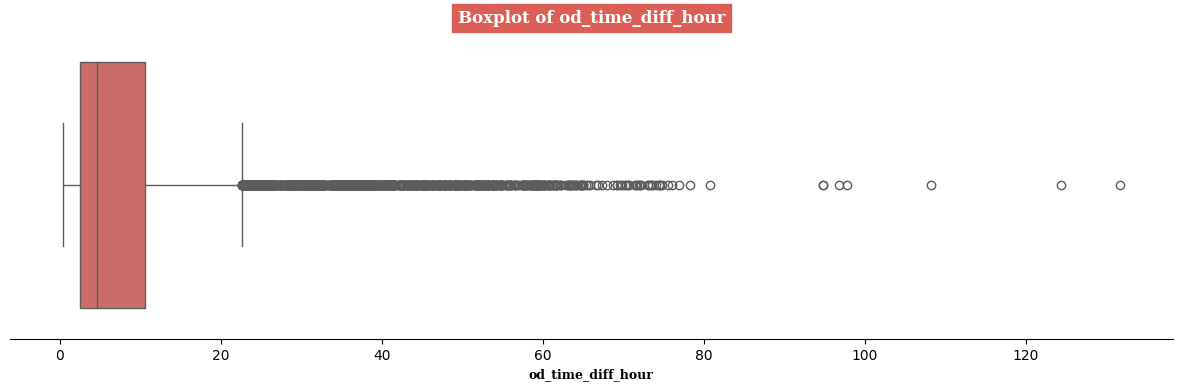

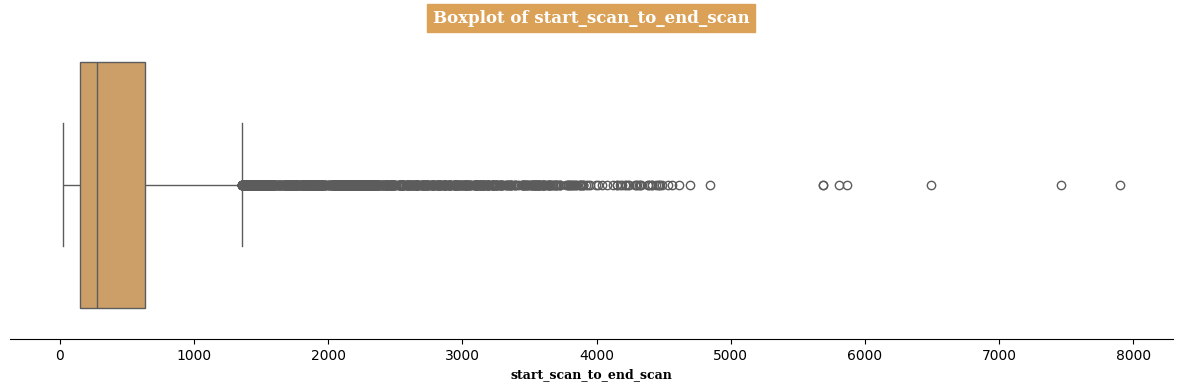

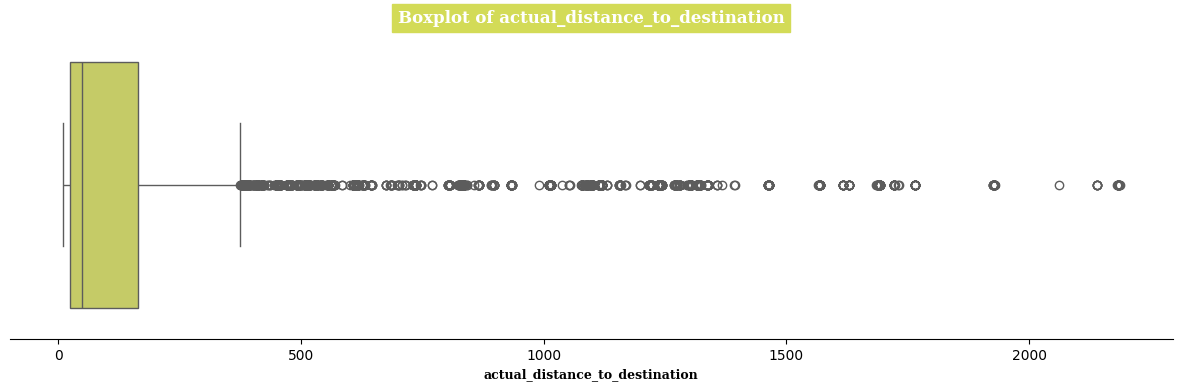

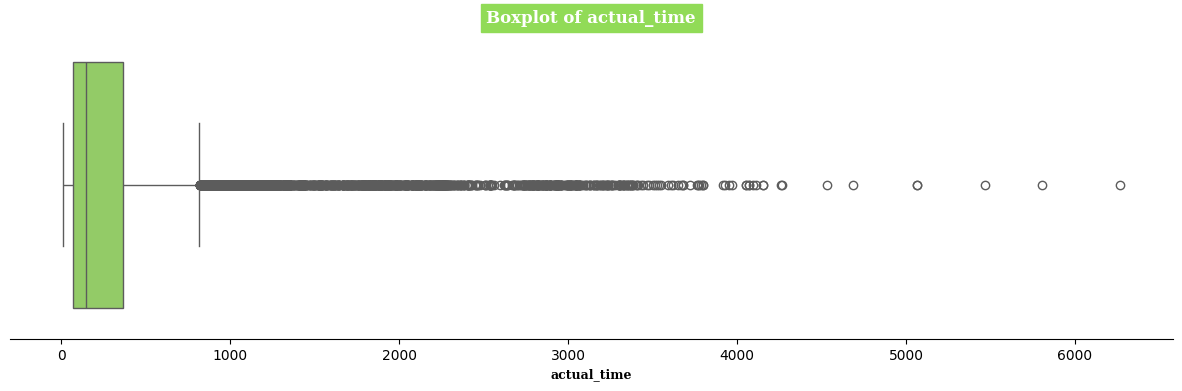

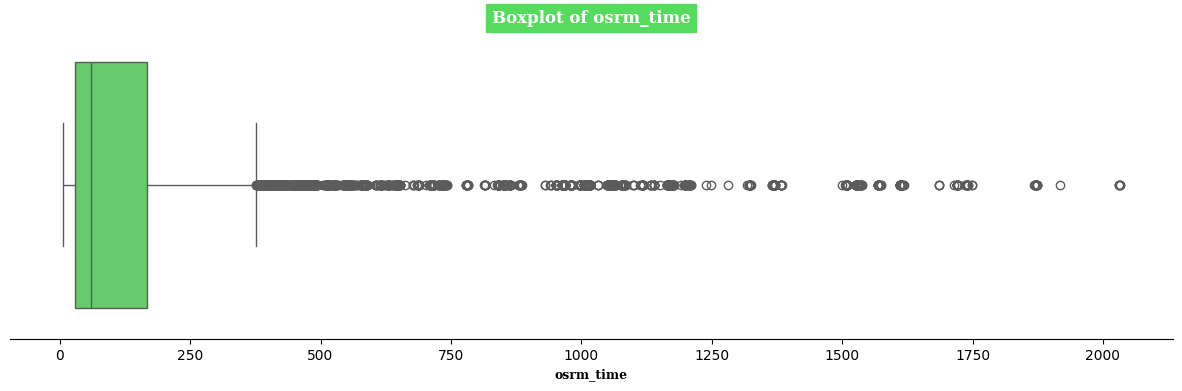

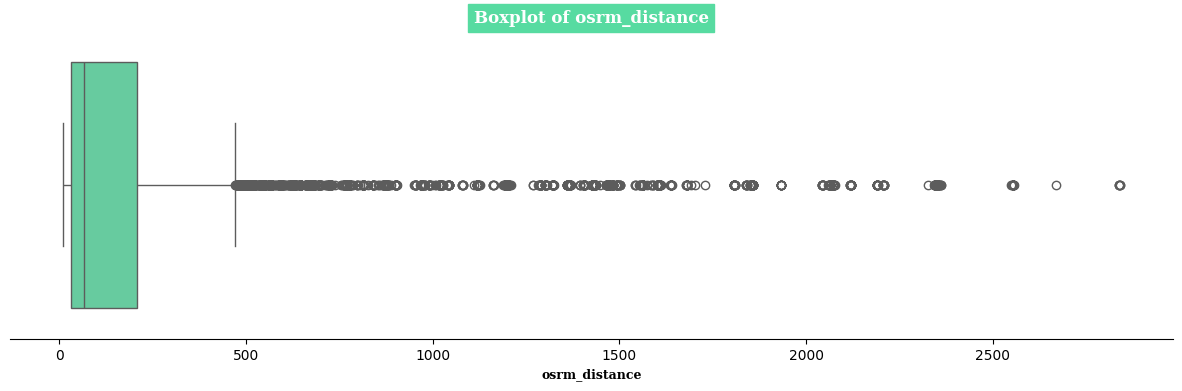

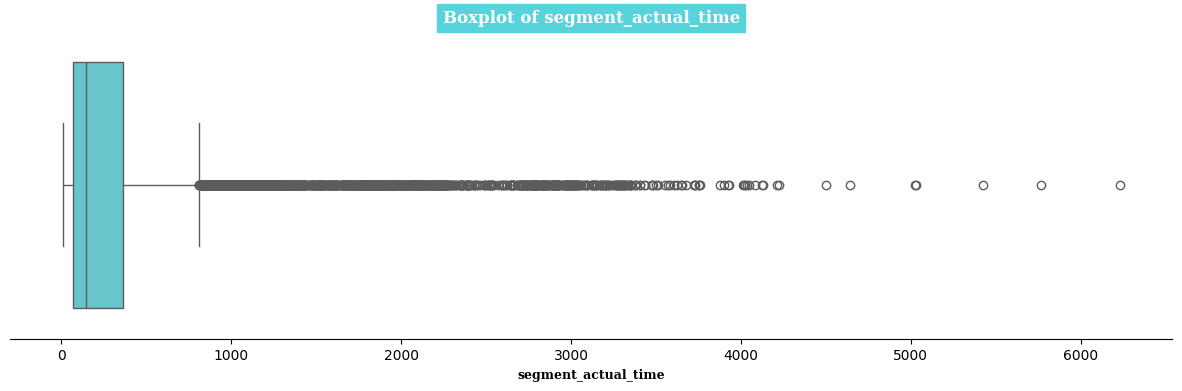

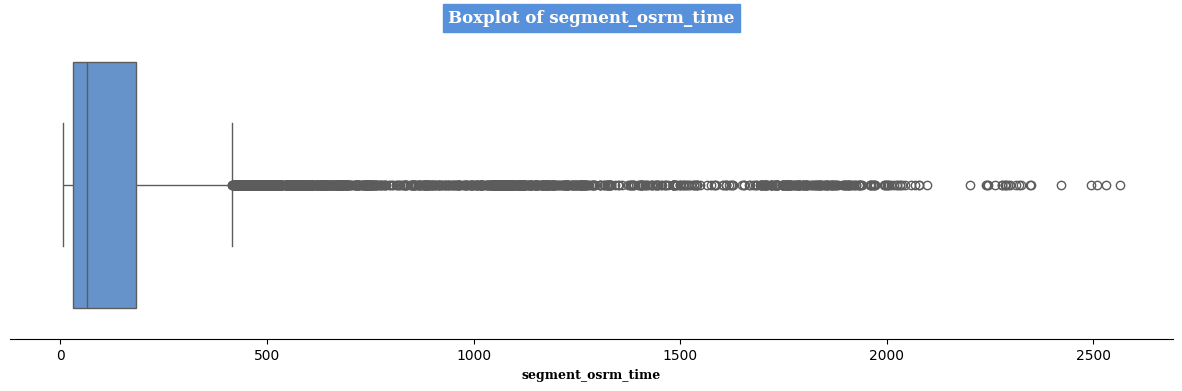

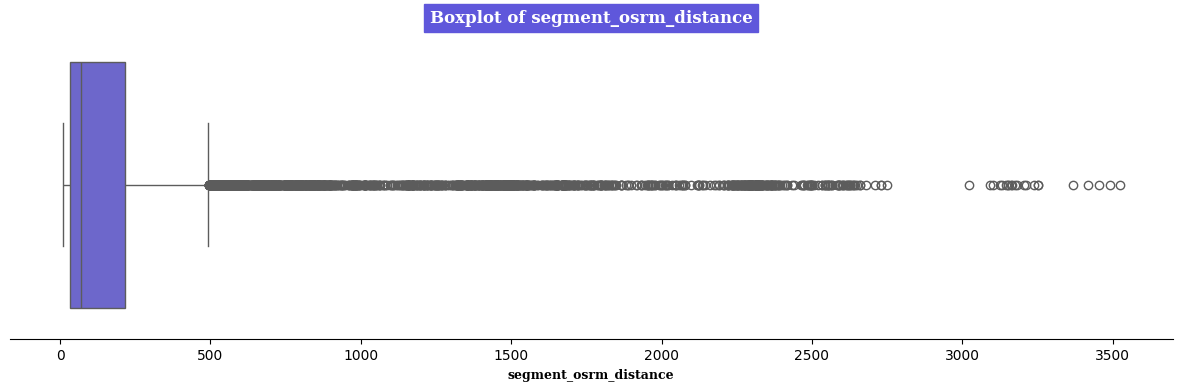

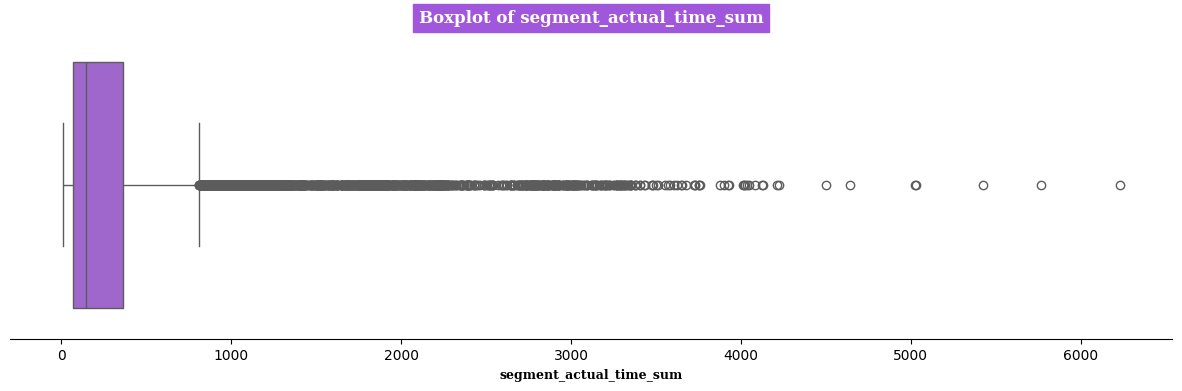

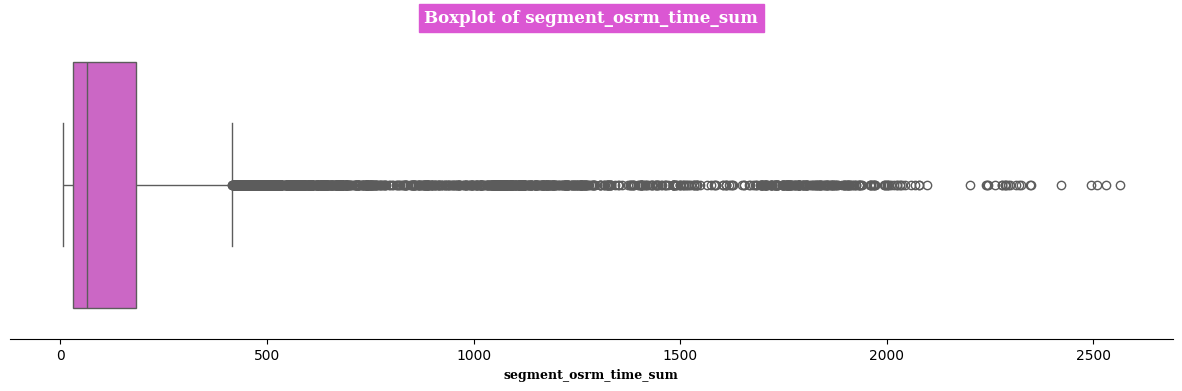

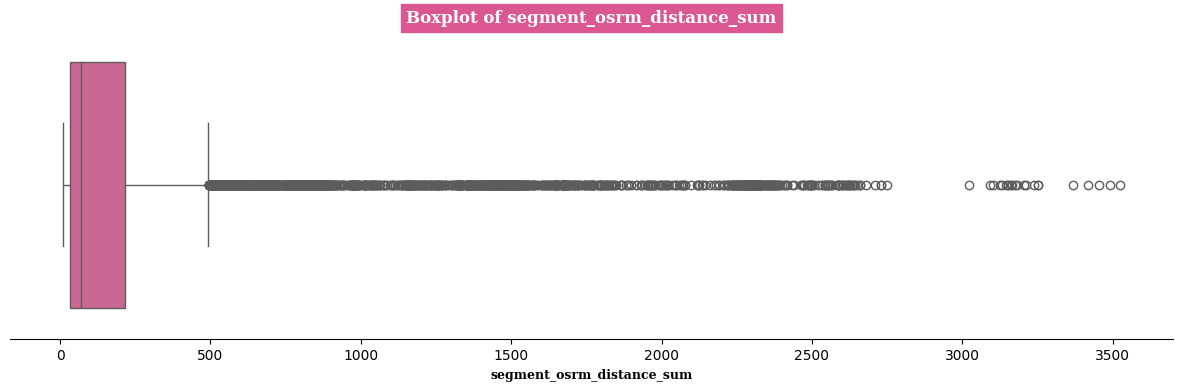

In [ ]:
cp = sns.color_palette("hls", len(numerical_cols.columns))
for i,col in enumerate(numerical_cols):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=col, data=numerical_cols,color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of {col}',fontfamily='serif',fontweight='bold',fontsize=12,color='w',backgroundcolor=cp[i])
    plt.xlabel(f'{col}',fontfamily='serif',fontweight='bold',fontsize=9)
    plt.show()

In [ ]:
#IQR-Method
Q1=numerical_cols.quantile(0.25)
Q3=numerical_cols.quantile(0.75)
IQR=Q3-Q1
print(IQR)

od_time_diff_hour                   8.060000
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64


In [ ]:
numerical_cols.shape

(14787, 12)

In [ ]:
clipped_num_df=numerical_cols.copy()

In [ ]:
clipped_num_df=numerical_cols[~((numerical_cols<(Q1-(1.5*IQR)))|(numerical_cols>(Q3+(1.5*IQR)))).any(axis=1)]

In [ ]:
clipped_num_df.shape

(12723, 12)

In [ ]:
(numerical_cols.shape[0]-clipped_num_df.shape[0])/numerical_cols.shape[0]*100

13.958206532765265

In [ ]:
clipped_num_df.describe().T

count        mean         std        min  \
od_time_diff_hour               12723.0    5.350364    4.264697   0.390000   
start_scan_to_end_scan          12723.0  320.178731  255.555831  23.000000   
actual_distance_to_destination  12723.0   72.317812   72.070232   9.002461   
actual_time                     12723.0  177.452723  158.150841   9.000000   
osrm_time                       12723.0   78.440305   72.333674   6.000000   
osrm_distance                   12723.0   91.734030   89.566572   9.072900   
segment_actual_time             12723.0  175.796274  157.099770   9.000000   
segment_osrm_time               12723.0   85.908355   79.604978   6.000000   
segment_osrm_distance           12723.0   97.971558   94.819043   9.072900   
segment_actual_time_sum         12723.0  175.796274  157.099770   9.000000   
segment_osrm_time_sum           12723.0   85.908355   79.604978   6.000000   
segment_osrm_distance_sum       12723.0   97.971558   94.819043   9.072900   

                                       25%         50%         75%  \
od_time_diff_hour                 2.280000    3.890000    7.065000   
start_scan_to_end_scan          136.000000  233.000000  423.000000   
actual_distance_to_destination   21.395561   38.525319  101.673567   
actual_time                      61.000000  114.000000  251.000000   
osrm_time                        27.000000   50.000000  109.000000   
osrm_distance                    28.344450   48.418300  131.316850   
segment_actual_time              60.000000  113.000000  248.000000   
segment_osrm_time                28.000000   53.000000  125.000000   
segment_osrm_distance            29.437950   54.090300  140.529400   
segment_actual_time_sum          60.000000  113.000000  248.000000   
segment_osrm_time_sum            28.000000   53.000000  125.000000   
segment_osrm_distance_sum        29.437950   54.090300  140.529400   

                                        max  
od_time_diff_hour                 22.630000  
start_scan_to_end_scan          1355.000000  
actual_distance_to_destination   373.441224  
actual_time                      815.000000  
osrm_time                        376.000000  
osrm_distance                    463.478100  
segment_actual_time              810.000000  
segment_osrm_time                408.000000  
segment_osrm_distance            489.571600  
segment_actual_time_sum          810.000000  
segment_osrm_time_sum            408.000000  
segment_osrm_distance_sum        489.571600

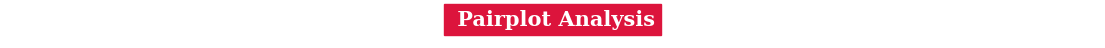

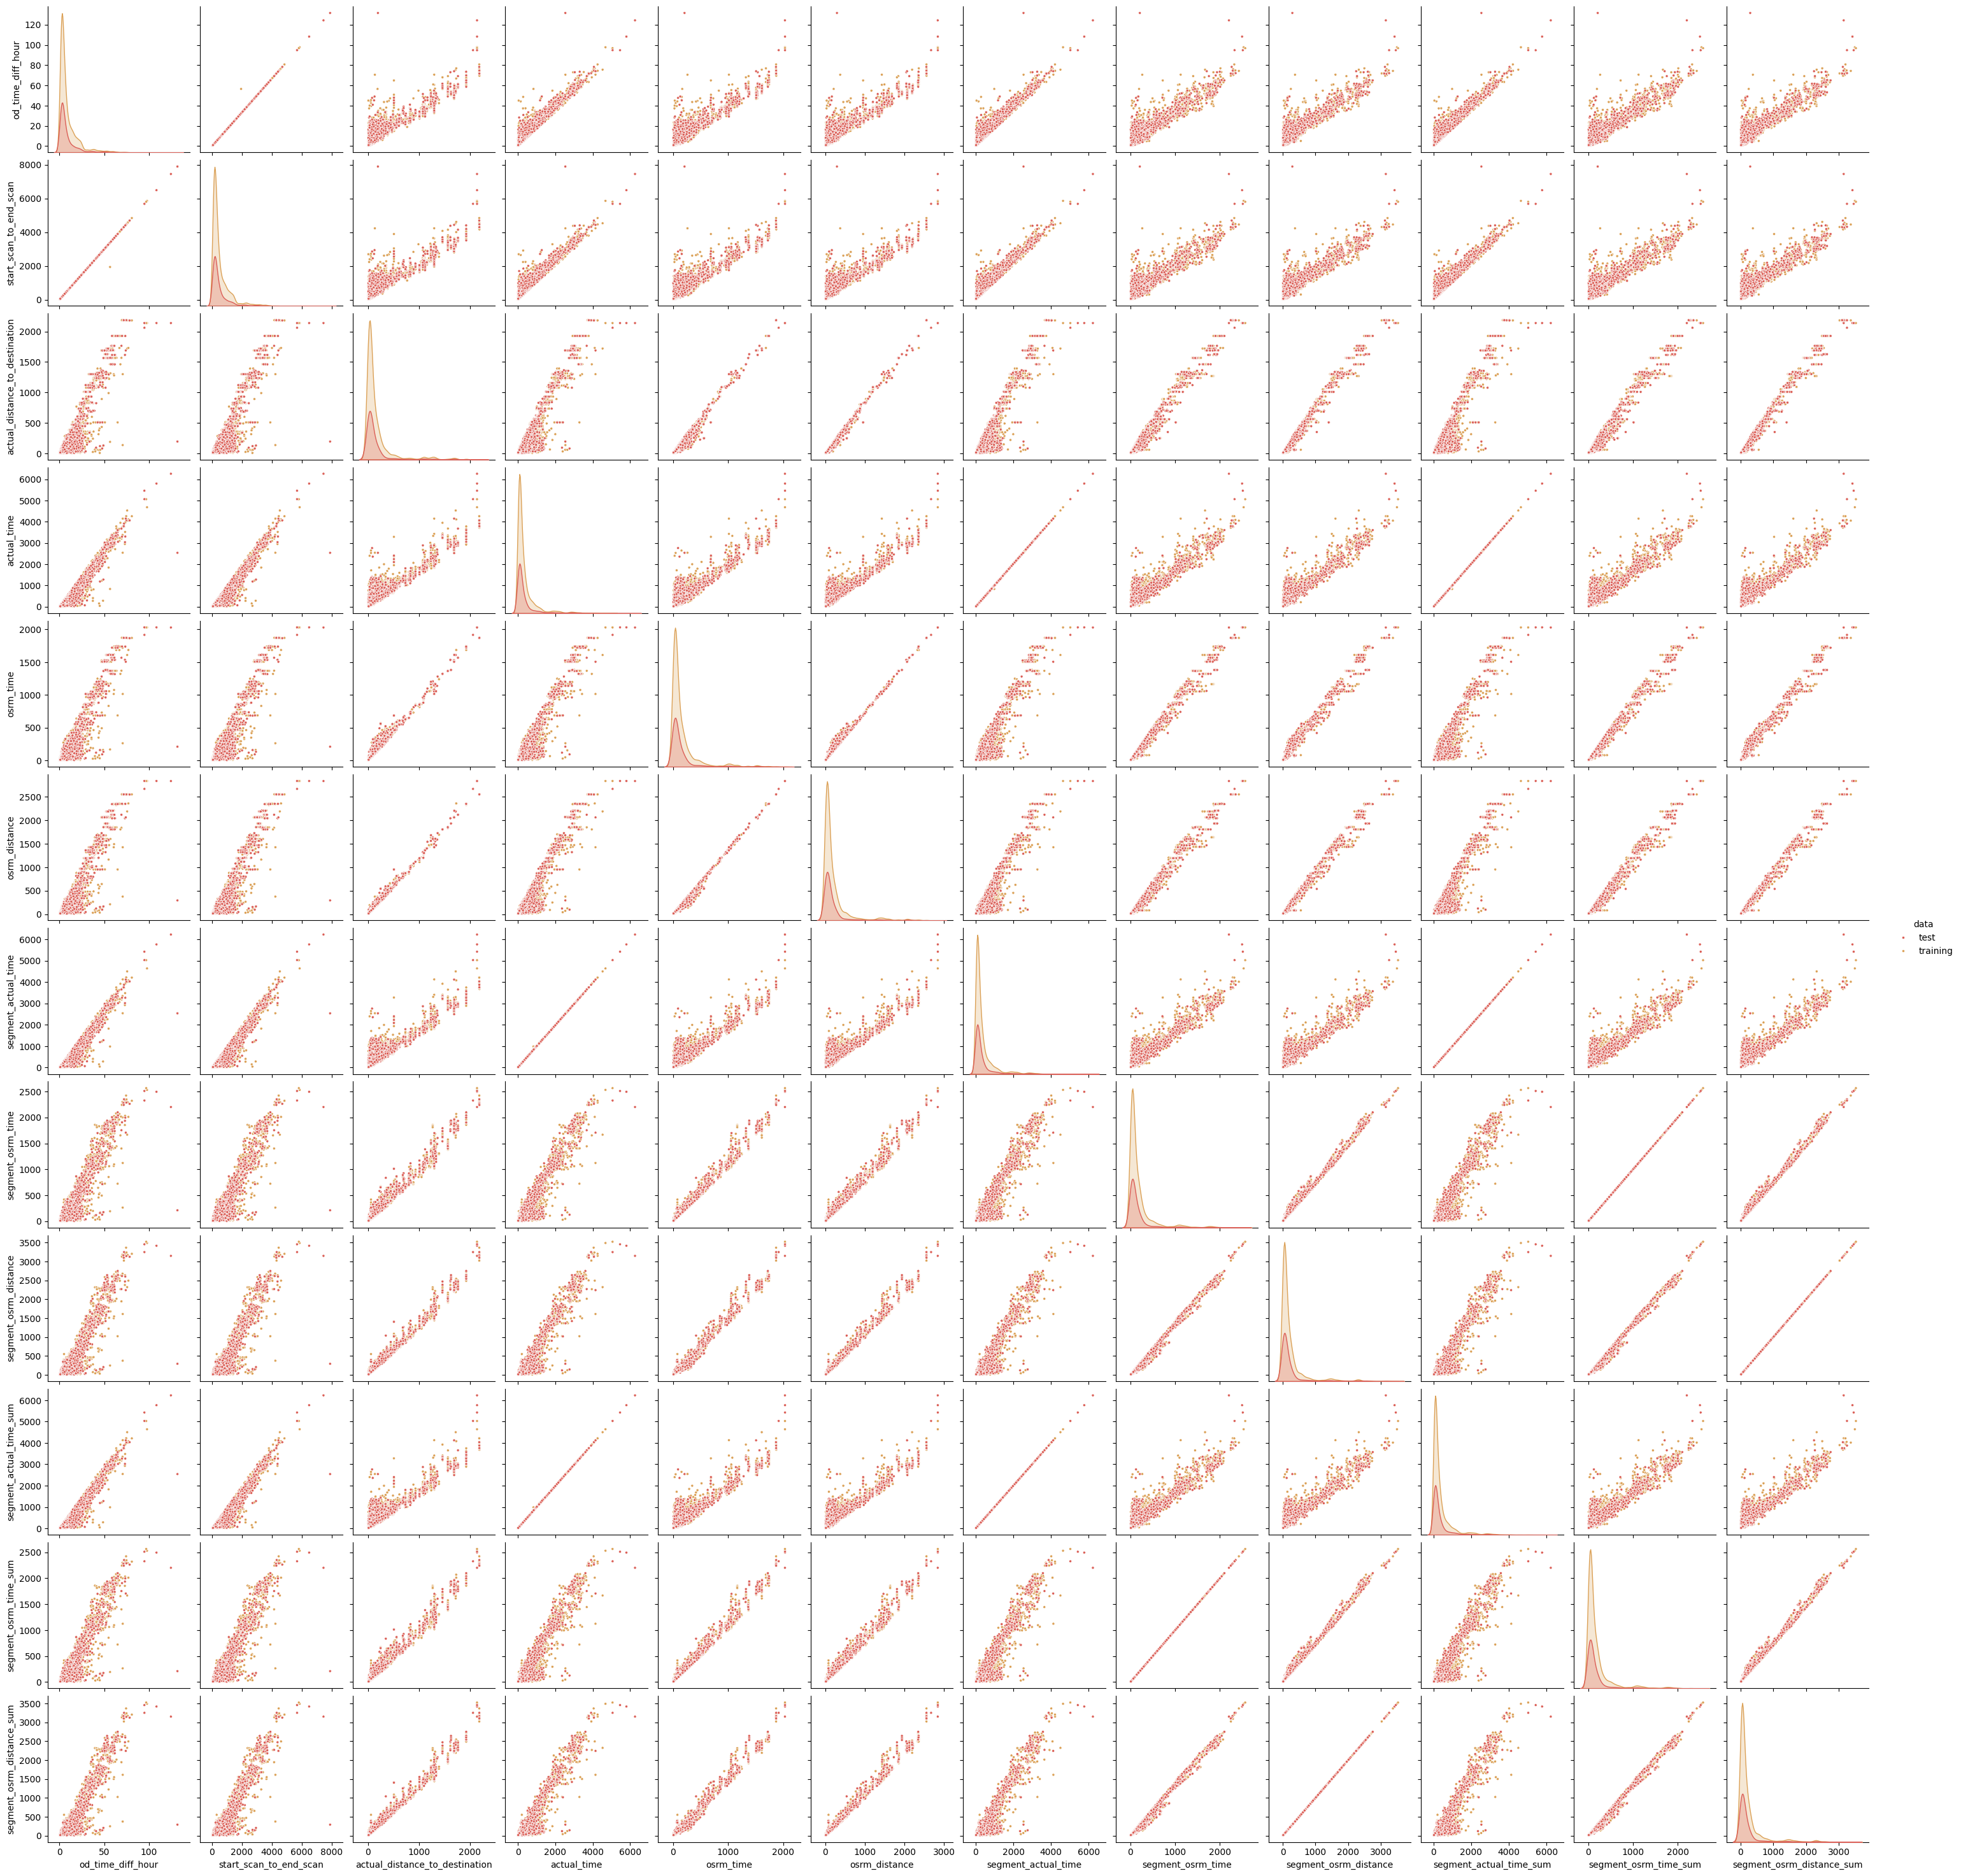

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.title(f' Pairplot Analysis',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='crimson',color='w')
cp = sns.color_palette("hls", len(clipped_num_df.columns))
sns.pairplot(data = trip_agg_df,vars = clipped_num_df,hue='data',markers = '.',palette=cp)
plt.show()

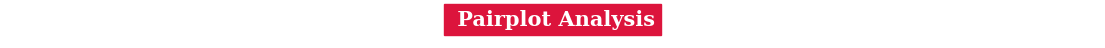

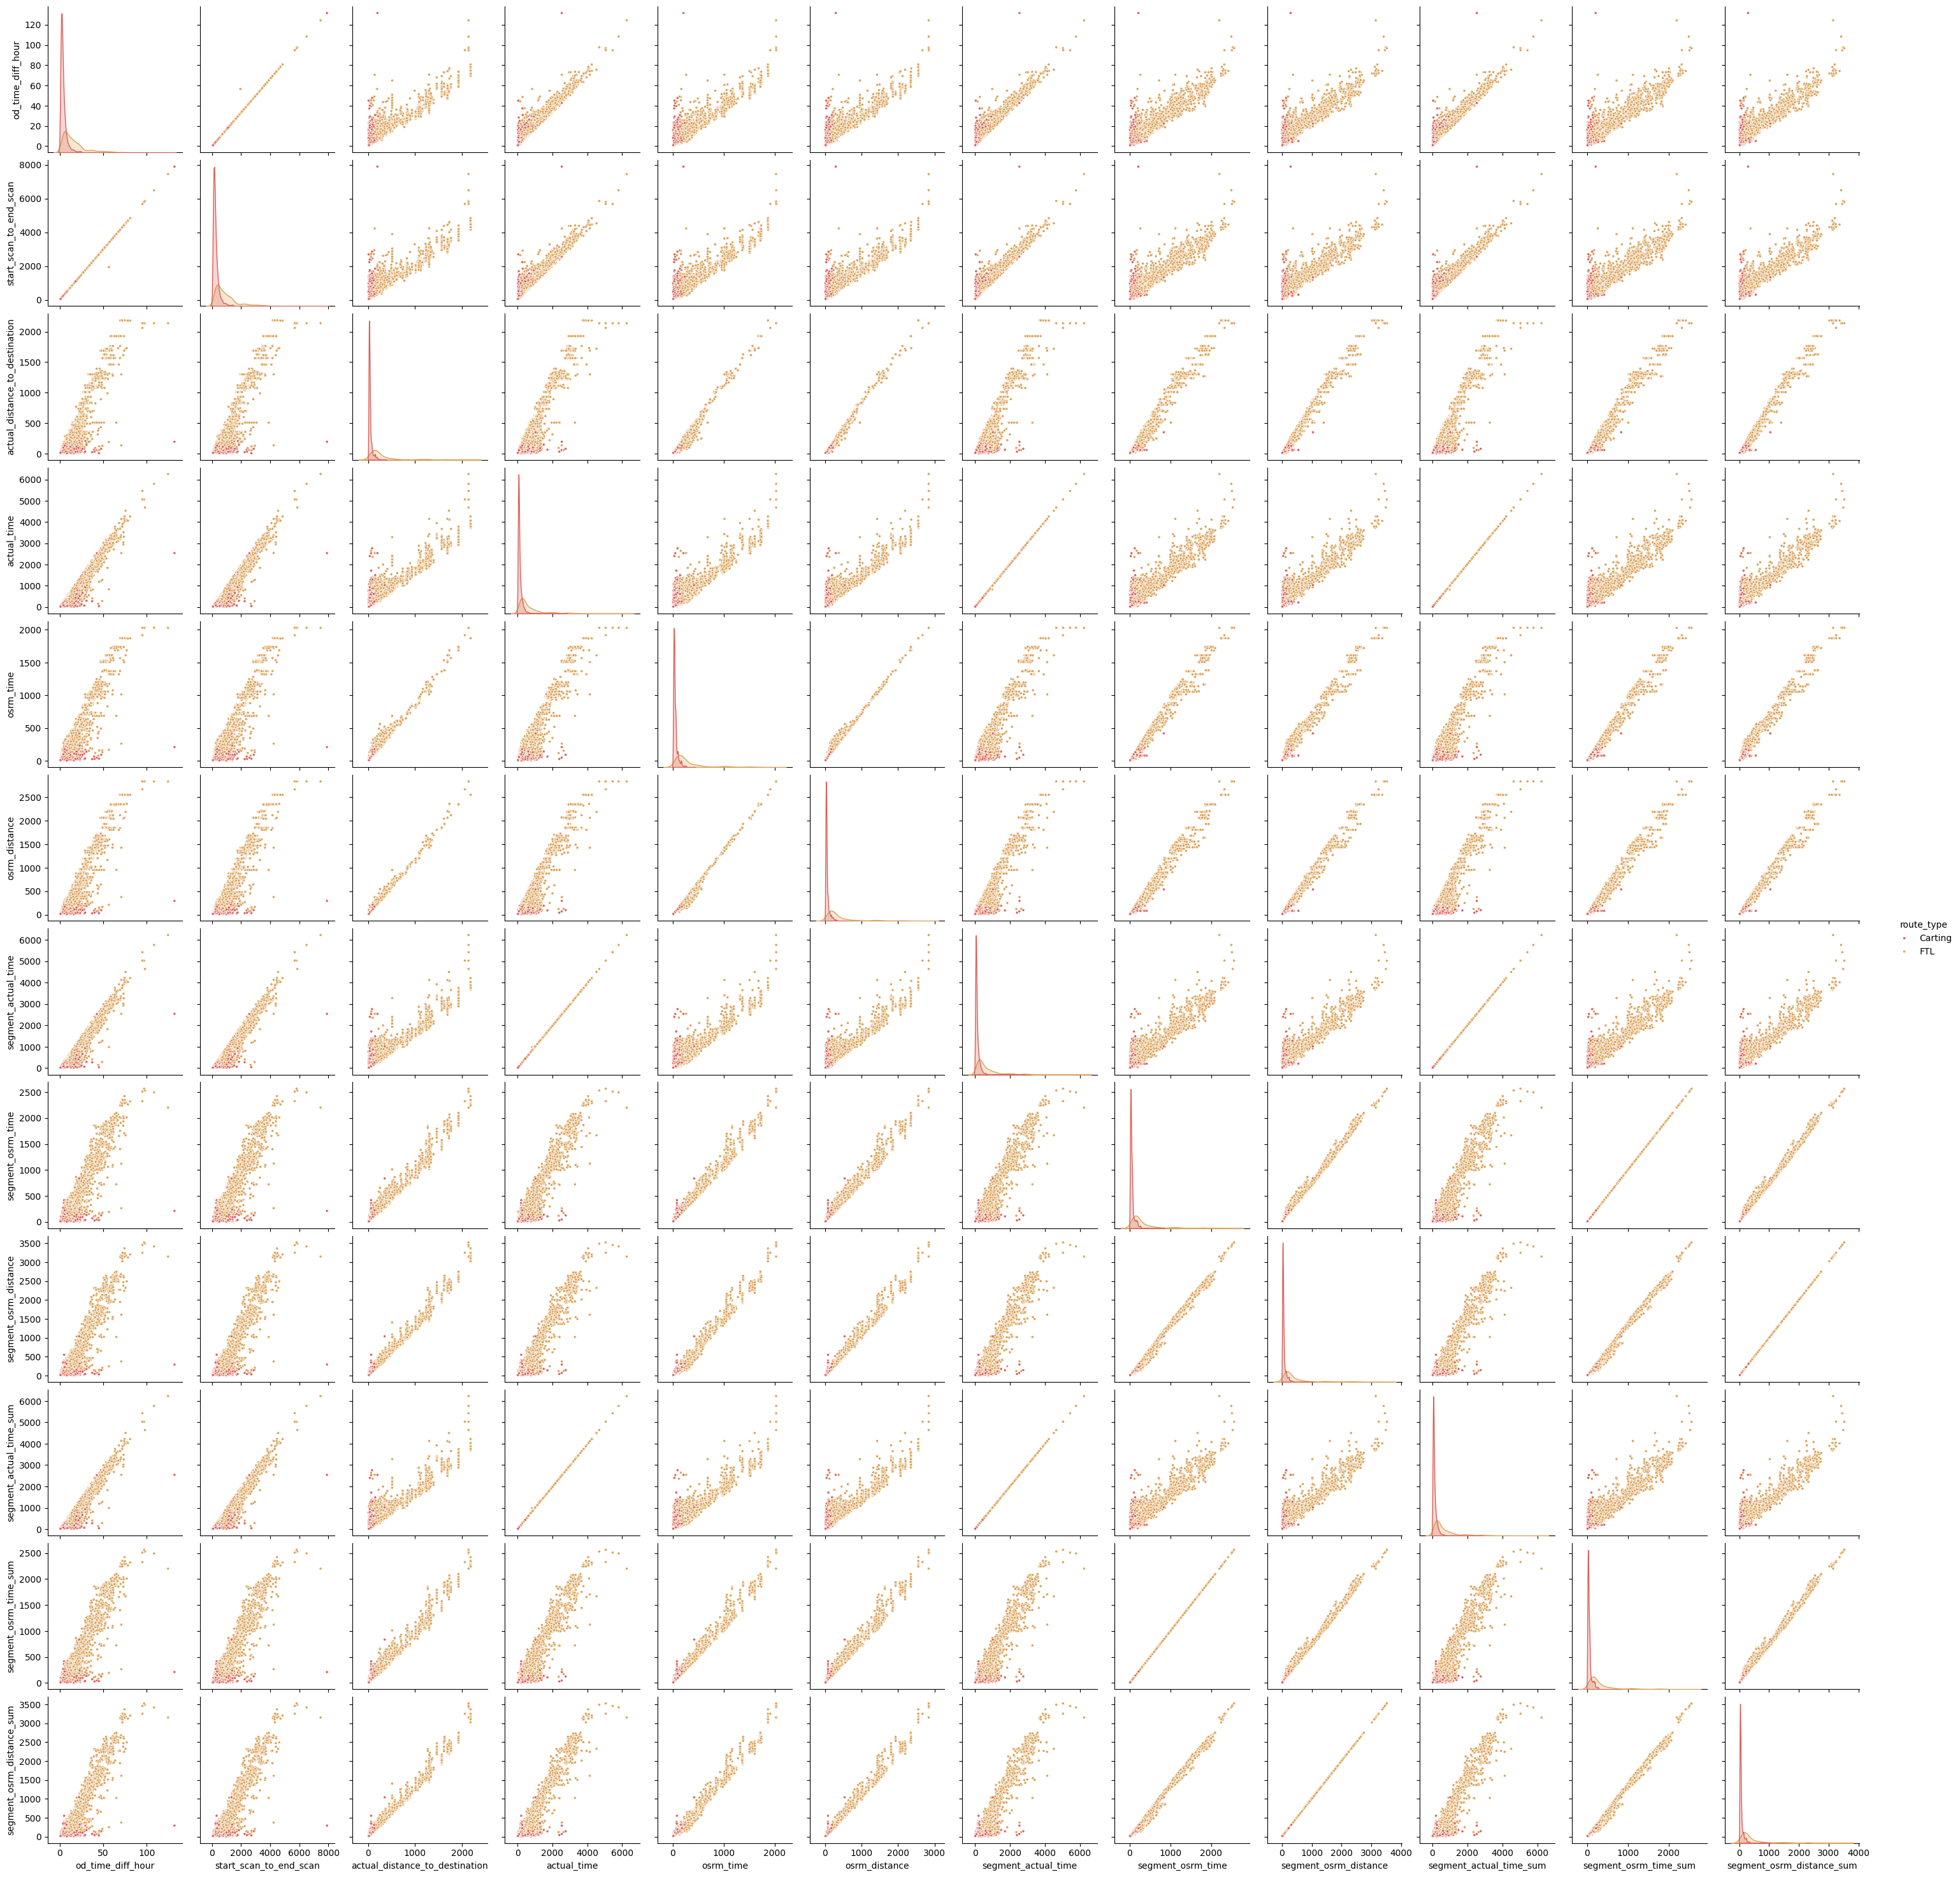

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.title(f' Pairplot Analysis',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='crimson',color='w')
cp = sns.color_palette("hls", len(clipped_num_df.columns))
sns.pairplot(data = trip_agg_df,vars = clipped_num_df,hue='route_type',markers = '.',palette=cp)
plt.show()

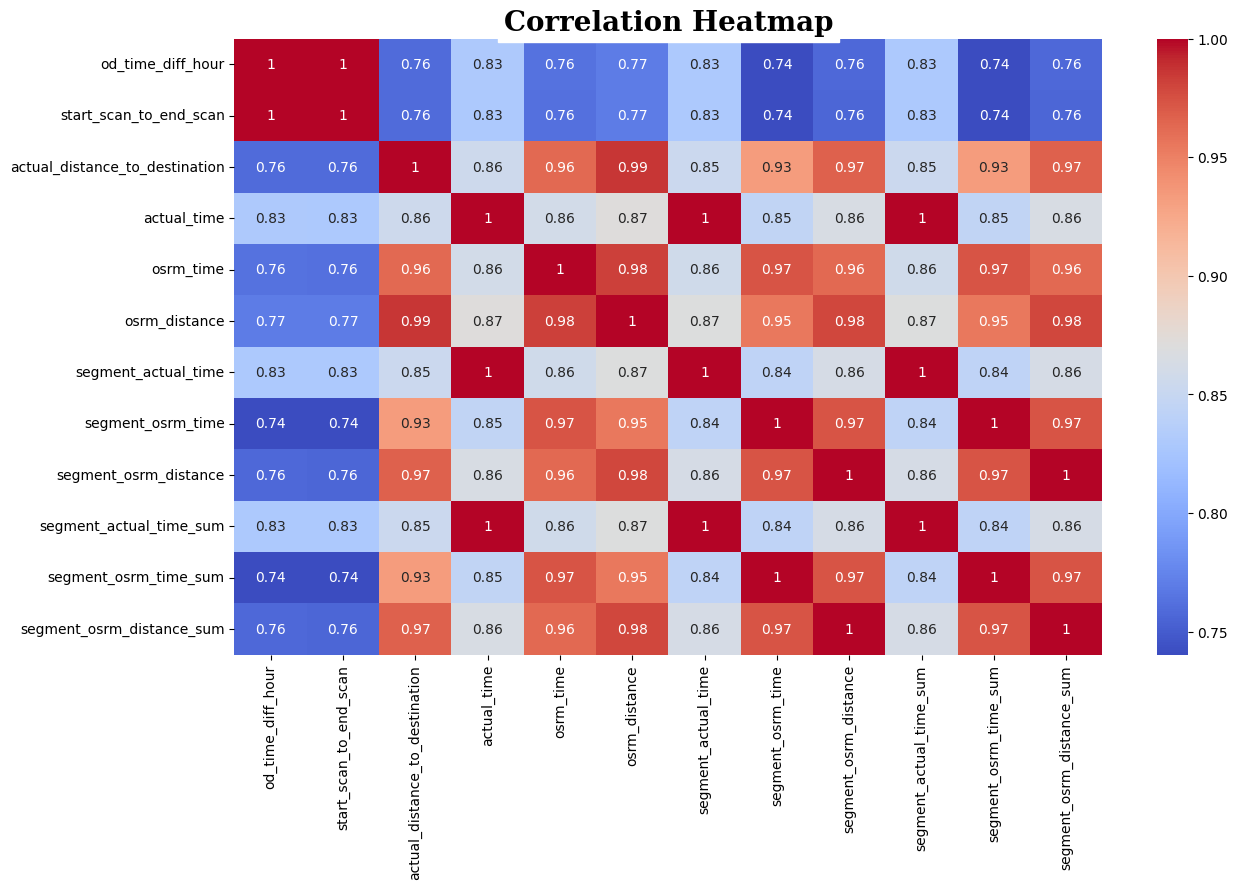

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(clipped_num_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='white',color='black')
plt.show()

####Inferences  &  Insights
* We have removed outliers in our data using IQR method which amount to 13% of the data and we have total `12723` rows of remaining data.
* `High Correlation` exists between numerical columns.
* Majority of the data is `Right-Skewed`.




####One-Hot Encoding


In [ ]:
Cat_cols=trip_agg_df.select_dtypes(include='category')
Cat_cols

data route_type
0      training        FTL
1      training    Carting
2      training        FTL
3      training    Carting
4      training        FTL
...         ...        ...
14782      test    Carting
14783      test    Carting
14784      test    Carting
14785      test    Carting
14786      test        FTL

[14787 rows x 2 columns]

In [ ]:
# Create the OneHotEncoder object and fit it to the data
encoder = OneHotEncoder(sparse=False)
encoded_cat_cols = encoder.fit_transform(trip_agg_df[Cat_cols.columns])

In [ ]:
# Call get_feature_names_out() on the fitted encoder
categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=encoder.get_feature_names_out(Cat_cols.columns))
display(categorical_encoded_df)


encoded_df = pd.concat([trip_agg_df,categorical_encoded_df],axis=1)
encoded_df

data_test  data_training  route_type_Carting  route_type_FTL
0            0.0            1.0                 0.0             1.0
1            0.0            1.0                 1.0             0.0
2            0.0            1.0                 0.0             1.0
3            0.0            1.0                 1.0             0.0
4            0.0            1.0                 0.0             1.0
...          ...            ...                 ...             ...
14782        1.0            0.0                 1.0             0.0
14783        1.0            0.0                 1.0             0.0
14784        1.0            0.0                 1.0             0.0
14785        1.0            0.0                 1.0             0.0
14786        1.0            0.0                 0.0             1.0

[14787 rows x 4 columns]

trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671042288605164  training    Carting   
2      trip-153671043369099517  training        FTL   
3      trip-153671046011330457  training    Carting   
4      trip-153671052974046625  training        FTL   
...                        ...       ...        ...   
14782  trip-153861095625827784      test    Carting   
14783  trip-153861104386292051      test    Carting   
14784  trip-153861106442901555      test    Carting   
14785  trip-153861115439069069      test    Carting   
14786  trip-153861118270144424      test        FTL   

                   od_start_time                od_end_time  \
0     2018-09-12 16:39:46.858469 2018-09-12 16:39:46.858469   
1     2018-09-12 02:03:09.655591 2018-09-12 02:03:09.655591   
2     2018-09-14 03:40:17.106733 2018-09-14 03:40:17.106733   
3     2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4     2018-09-12 00:02:09.740725 2018-09-12 03:54:43.114421   
...                          ...                        ...   
14782 2018-10-03 23:55:56.258533 2018-10-04 06:41:25.409035   
14783 2018-10-03 23:57:23.863155 2018-10-04 00:57:59.294434   
14784 2018-10-04 02:51:27.075797 2018-10-04 02:51:27.075797   
14785 2018-10-03 23:59:14.390954 2018-10-04 02:29:04.272194   
14786 2018-10-04 03:58:40.726547 2018-10-04 03:58:40.726547   

       od_time_diff_hour         trip_creation_time Trip_creation_month  \
0                  37.67 2018-09-12 00:00:16.535741                 Sep   
1                   3.03 2018-09-12 00:00:22.886430                 Sep   
2                  65.57 2018-09-12 00:00:33.691250                 Sep   
3                   1.67 2018-09-12 00:01:00.113710                 Sep   
4                  11.97 2018-09-12 00:02:09.740725                 Sep   
...                  ...                        ...                 ...   
14782               4.30 2018-10-03 23:55:56.258533                 Oct   
14783               1.01 2018-10-03 23:57:23.863155                 Oct   
14784               7.04 2018-10-03 23:57:44.429324                 Oct   
14785               5.82 2018-10-03 23:59:14.390954                 Oct   
14786               5.91 2018-10-03 23:59:42.701692                 Oct   

       Trip_creation_day  Trip_creation_hour  ...  destination_city  \
0                     12                   0  ...           Gurgaon   
1                     12                   0  ...        Chikblapur   
2                     12                   0  ...        Chandigarh   
3                     12                   0  ...            Mumbai   
4                     12                   0  ...            Hospet   
...                  ...                 ...  ...               ...   
14782                  3                  23  ...          Zirakpur   
14783                  3                  23  ...         Faridabad   
14784                  3                  23  ...            Kanpur   
14785                  3                  23  ...              Eral   
14786                  3                  23  ...           Bellary   

      destination_state  destination_place  \
0               Haryana        Bilaspur_HB   
1             Karnataka         ShntiSgr_D   
2                Punjab         Mehmdpur_H   
3           Maharashtra          MiraRd_IP   
4             Karnataka                      
...                 ...                ...   
14782            Punjab                 DC   
14783           Haryana         Blbgarh_DC   
14784     Uttar Pradesh        Central_H_6   
14785        Tamil Nadu         Busstand_D   
14786         Karnataka                 Dc   

                                    Src_to_Dest_Corridor  \
0      Kanpur_Central_H_6 (Uttar Pradesh)<--->Gurgaon...   
1      Doddablpur_ChikaDPP_D (Karnataka)<--->Chikblap...   
2      Gurgaon_Bilaspur_HB (Haryana)<--->Chandigarh_M...   
3      Mumbai Hub (Maharashtra)<--->Mumbai_MiraRd_IP ...

Since there are only two values in these categorical columns we have used One-Hot Encoding.

#### MinMax Scaler

Since the data is Right-Skewed we have taken to Normalization using MinMax Scaler which performs Linear data Transformation and the resulting normalized values are between 0 & 1.

In [ ]:
# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_num=min_max_scaler.fit_transform(trip_agg_df[list(numerical_cols)])

min_max_scaled_num=pd.DataFrame(min_max_scaled_num,columns=numerical_cols.columns)
min_max_scaled_num

od_time_diff_hour  start_scan_to_end_scan  \
0               0.284038                0.283937   
1               0.020114                0.019937   
2               0.496610                0.496508   
3               0.009752                0.009778   
4               0.088229                0.088127   
...                  ...                     ...   
14782           0.029790                0.029714   
14783           0.004724                0.004698   
14784           0.050667                0.050540   
14785           0.041371                0.041143   
14786           0.042057                0.041905   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                            0.374613     0.248242   0.350938       0.346972   
1                            0.029476     0.021419   0.030602       0.026859   
2                            0.880999     0.533568   0.855874       0.828325   
3                            0.003753     0.007992   0.004442       0.003747   
4                            0.054395     0.053069   0.054788       0.048647   
...                               ...          ...        ...            ...   
14782                        0.022392     0.011829   0.027641       0.022745   
14783                        0.002990     0.001918   0.002962       0.002478   
14784                        0.013631     0.043638   0.020731       0.017602   
14785                        0.057736     0.040761   0.085390       0.057237   
14786                        0.026213     0.042519   0.030602       0.025258   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 0.247388           0.391712               0.373134   
1                 0.021218           0.023065               0.021373   
2                 0.530301           0.756450               0.721625   
3                 0.008037           0.003909               0.003074   
4                 0.053207           0.042611               0.039185   
...                    ...                ...                    ...   
14782             0.011734           0.021892               0.015872   
14783             0.001929           0.001955               0.001996   
14784             0.043723           0.032056               0.027262   
14785             0.040026           0.084050               0.061020   
14786             0.042598           0.023847               0.020346   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                     0.247388               0.391712   
1                     0.021218               0.023065   
2                     0.530301               0.756450   
3                     0.008037               0.003909   
4                     0.053207               0.042611   
...                        ...                    ...   
14782                 0.011734               0.021892   
14783                 0.001929               0.001955   
14784                 0.043723               0.032056   
14785                 0.040026               0.084050   
14786                 0.042598               0.023847   

       segment_osrm_distance_sum  
0                       0.373134  
1                       0.021373  
2                       0.721625  
3                       0.003074  
4                       0.039185  
...                          ...  
14782                   0.015872  
14783                   0.001996  
14784                   0.027262  
14785                   0.061020  
14786                   0.020346  

[14787 rows x 12 columns]

### Hypothesis Testing

In [ ]:
clipped_num_df.head()

od_time_diff_hour  start_scan_to_end_scan  actual_distance_to_destination  \
1               3.03                   180.0                       73.186911   
3               1.67                   100.0                       17.175274   
4              11.97                   717.0                      127.448500   
5               3.17                   189.0                       24.597048   
6               1.63                    98.0                        9.100510   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
1        143.0       68.0        85.1110                141.0   
3         59.0       15.0        19.6800                 59.0   
4        341.0      117.0       146.7918                340.0   
5         61.0       23.0        28.0647                 60.0   
6         24.0       13.0        12.0184                 24.0   

   segment_osrm_time  segment_osrm_distance  segment_actual_time_sum  \
1               65.0                84.1894                    141.0   
3               16.0                19.8766                     59.0   
4              115.0               146.7919                    340.0   
5               23.0                28.0647                     60.0   
6               13.0                12.0184                     24.0   

   segment_osrm_time_sum  segment_osrm_distance_sum  
1                   65.0                    84.1894  
3                   16.0                    19.8766  
4                  115.0                   146.7919  
5                   23.0                    28.0647  
6                   13.0                    12.0184

In [ ]:
clipped_num_df[['actual_time','osrm_time','segment_actual_time_sum','osrm_distance','segment_osrm_distance_sum','segment_osrm_time_sum']].describe().T

count        mean         std     min       25%  \
actual_time                12723.0  177.452723  158.150841  9.0000  61.00000   
osrm_time                  12723.0   78.440305   72.333674  6.0000  27.00000   
segment_actual_time_sum    12723.0  175.796274  157.099770  9.0000  60.00000   
osrm_distance              12723.0   91.734030   89.566572  9.0729  28.34445   
segment_osrm_distance_sum  12723.0   97.971558   94.819043  9.0729  29.43795   
segment_osrm_time_sum      12723.0   85.908355   79.604978  6.0000  28.00000   

                                50%        75%       max  
actual_time                114.0000  251.00000  815.0000  
osrm_time                   50.0000  109.00000  376.0000  
segment_actual_time_sum    113.0000  248.00000  810.0000  
osrm_distance               48.4183  131.31685  463.4781  
segment_osrm_distance_sum   54.0903  140.52940  489.5716  
segment_osrm_time_sum       53.0000  125.00000  408.0000

In [ ]:
actual_time = clipped_num_df['actual_time']
osrm_time = clipped_num_df['osrm_time']
segment_actual_time_sum = clipped_num_df['segment_actual_time_sum']
osrm_distance = clipped_num_df['osrm_distance']
segment_osrm_distance_sum = clipped_num_df['segment_osrm_distance_sum']
segment_osrm_time_sum = clipped_num_df['segment_osrm_time_sum']

We are going to check if the data is normally distributed(Gaussian) or not using:

1. Graphical:
    * Histogram Distribution
    * QQ-PLot  Distribution
2. Tests:
    * Shapiro Test
    * Levene's Test


#### Hypothesis testing -Actual Time aggregated value and OSRM Time aggregated value.

In [ ]:
 #@title Normalization check using Histogram

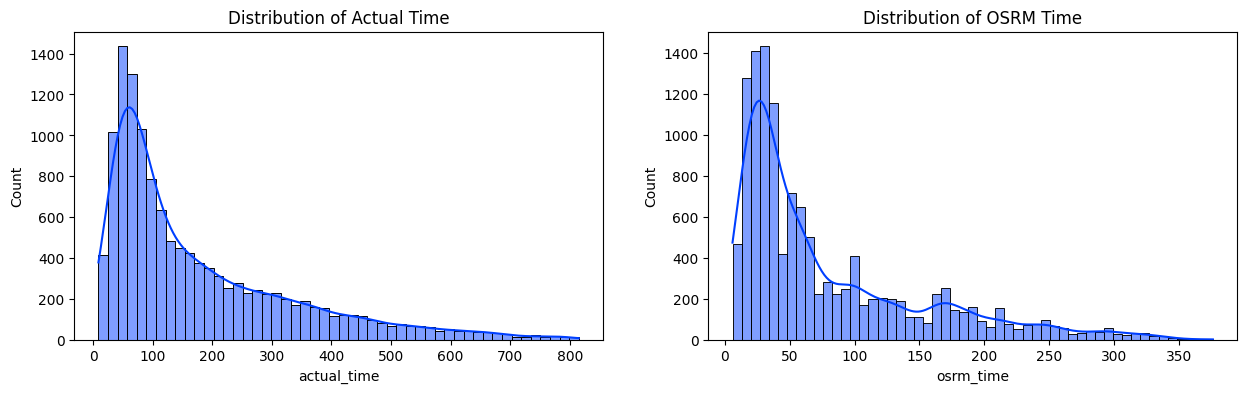

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(actual_time,kde=True)
plt.title('Distribution of Actual Time')

plt.subplot(2,2,2)
sns.histplot(osrm_time,kde=True)
plt.title('Distribution of OSRM Time')

plt.subplots_adjust(hspace=0.5)



plt.show()


In [ ]:
#@title Normalization check using QQ-Plots

<Figure size 1500x1000 with 0 Axes>

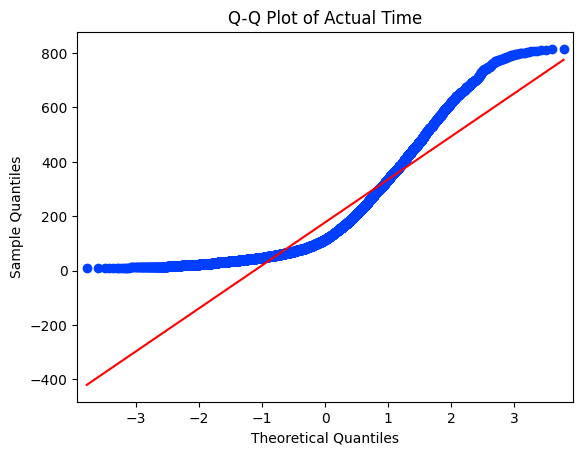

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(actual_time,dist=norm,line="s")
plt.title('Q-Q Plot of Actual Time')

plt.show()


<Figure size 1500x1000 with 0 Axes>

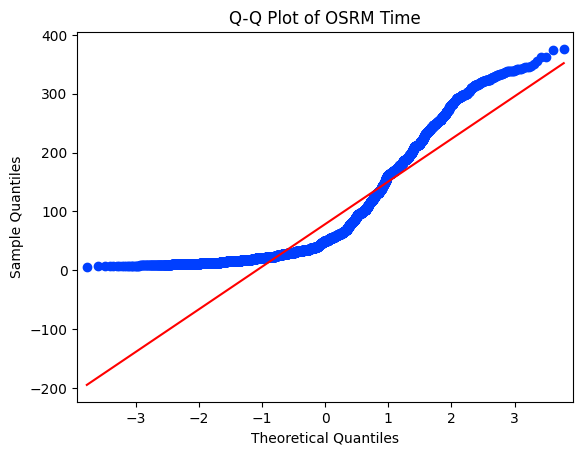

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(osrm_time,dist=norm,line="s")
plt.title('Q-Q Plot of OSRM Time')

plt.show()

In [ ]:
#@title Shapiro-Wilk Test

In [ ]:
s_stat1,spvalue1=shapiro(actual_time)
s_stat2,spvalue2=shapiro(osrm_time)

In [ ]:
for i in [spvalue1,spvalue2]:
  if i<0.05:
    print("Distribution is Not Normal")
  else:
    print("Distribution is Normal")

Distribution is Not Normal
Distribution is Not Normal


In [ ]:
#@title Levene's test

In [ ]:
l_stat,l_pvalue=levene(actual_time,osrm_time)

In [ ]:
if l_pvalue<0.05:
  print("Variance is Not Equal")
else:
  print("Variance is Equal")

Variance is Not Equal


In [ ]:
#setting Null and Alternate Hypothesis
H0="The Aggregated Actual time & the Aggregated OSRM time have same Mean values."
H1="The Aggregated Actual time & the Aggregated OSRM time do not have same Mean values."

Since the data isn't normally distributed we have decided to use `Mann-Whitney U` Test (also known as the Wilcoxon rank-sum test) which is a non-parametric test used to determine whether there is a significant difference between our two different variables.

In [ ]:
#@title Mann-Whitney U Test

In [ ]:
mstat, p_value = mannwhitneyu(actual_time, osrm_time)
p_value

0.0

In [ ]:
if p_value<0.05:
  print("Reject Null Hypothesis-",H1)
else:
  print("Failed to reject Null Hypothesis-",H0)

Reject Null Hypothesis- The Aggregated Actual time & the Aggregated OSRM time do not have same Mean values.


With 95% confidence we can say that the mean values of Aggregated Actual time & the Aggregated OSRM time are not similar.

### Hypothesis testing - Actual Time aggregated value and Segment Actual Time aggregated value.

In [ ]:
 #@title Normalization check using Histogram

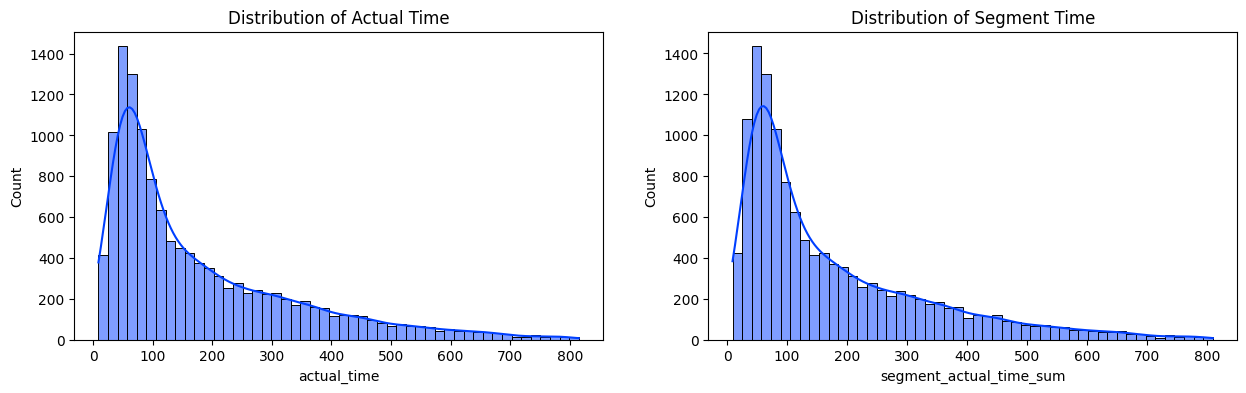

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(actual_time,kde=True)
plt.title('Distribution of Actual Time')

plt.subplot(2,2,2)
sns.histplot(segment_actual_time_sum,kde=True)
plt.title('Distribution of Segment Time')

plt.subplots_adjust(hspace=0.5)



plt.show()


In [ ]:
 #@title Normalization check using QQ-Plots

<Figure size 1500x1000 with 0 Axes>

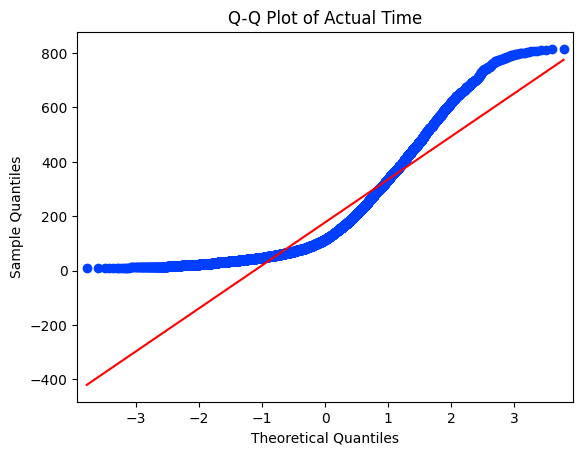

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(actual_time,dist=norm,line="s")
plt.title('Q-Q Plot of Actual Time')

plt.show()


<Figure size 1500x1000 with 0 Axes>

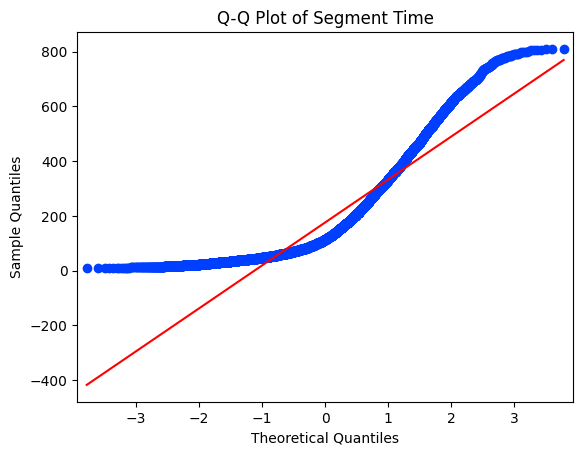

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(segment_actual_time_sum,dist=norm,line="s")
plt.title('Q-Q Plot of Segment Time')

plt.show()

In [ ]:
#@title Shapiro-Wilk Test

In [ ]:
s_stat1,spvalue1=shapiro(actual_time)
s_stat2,spvalue2=shapiro(segment_actual_time_sum)

In [ ]:
for i in [spvalue1,spvalue2]:
  if i<0.05:
    print("Distribution is Not Normal")
  else:
    print("Distribution is Normal")

Distribution is Not Normal
Distribution is Not Normal


In [ ]:
#@title Levene's test

In [ ]:
l_stat,l_pvalue=levene(actual_time,segment_actual_time_sum)

In [ ]:
if l_pvalue<0.05:
  print("Variance is Not Equal")
else:
  print("Variance is Equal")

Variance is Equal


In [ ]:
#setting Null and Alternate Hypothesis
H0="The Aggregated Actual Time & the Aggregated Segment Actual Time have same Mean values."
H1="The Aggregated Actual Time & the Aggregated Segment Actual Time do not have same Mean values."

In [ ]:
#@title Mann-Whitney U Test

In [ ]:
mstat, p_value = mannwhitneyu(actual_time, segment_actual_time_sum)
p_value

0.3342240274629089

In [ ]:
if p_value<0.05:
  print("Reject Null Hypothesis-",H1)
else:
  print("Failed to reject Null Hypothesis-",H0)

Failed to reject Null Hypothesis- The Aggregated Actual Time & the Aggregated Segment Time have same Mean values.


With 95% confidence we can say that the mean values of the Aggregated Actual Time & the Aggregated Segment Actual Time are similar.

### Hypothesis testing - OSRM Distance aggregated value and Segment OSRM Distance aggregated value.

In [ ]:
 #@title Normalization check using Histogram

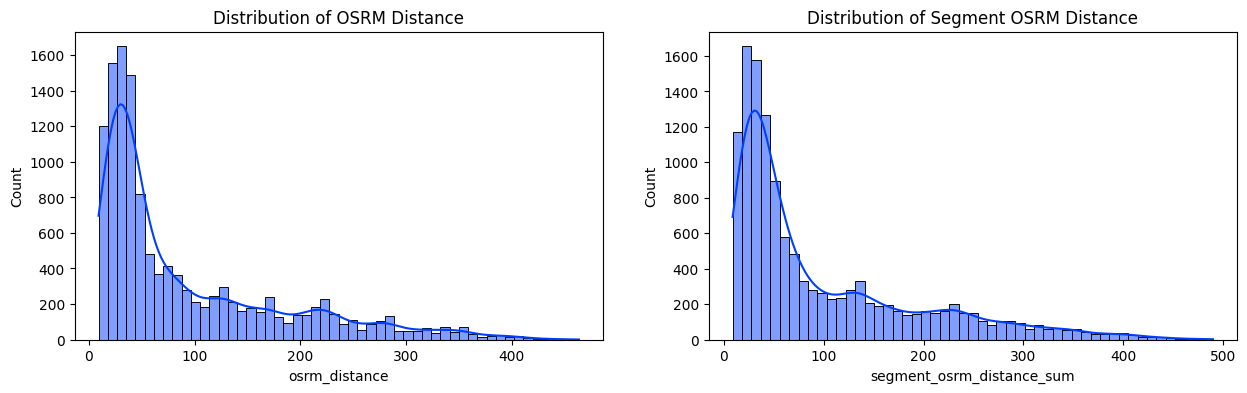

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(osrm_distance,kde=True)
plt.title('Distribution of OSRM Distance')

plt.subplot(2,2,2)
sns.histplot(segment_osrm_distance_sum,kde=True)
plt.title('Distribution of Segment OSRM Distance')

plt.subplots_adjust(hspace=0.5)



plt.show()


In [ ]:
 #@title Normalization check using QQ-Plots

<Figure size 1500x1000 with 0 Axes>

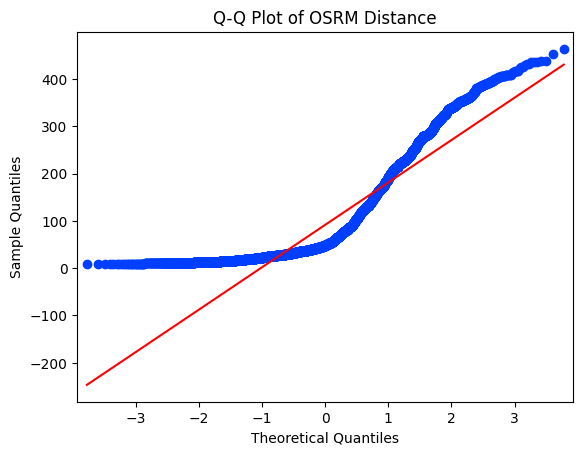

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(osrm_distance,dist=norm,line="s")
plt.title('Q-Q Plot of OSRM Distance')

plt.show()


<Figure size 1500x1000 with 0 Axes>

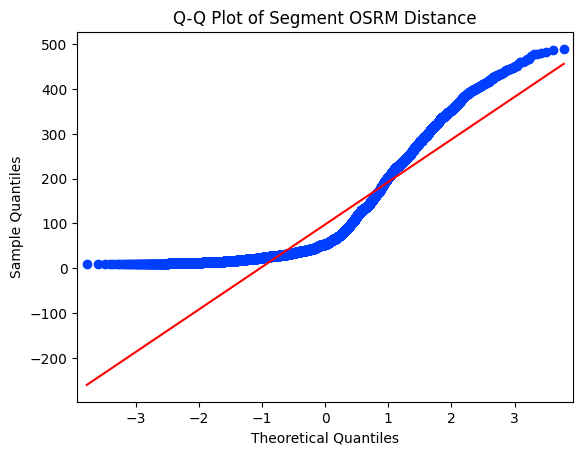

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(segment_osrm_distance_sum,dist=norm,line="s")
plt.title('Q-Q Plot of Segment OSRM Distance')

plt.show()

In [ ]:
#@title Shapiro-Wilk Test

In [ ]:
s_stat1,spvalue1=shapiro(osrm_distance)
s_stat2,spvalue2=shapiro(segment_osrm_distance_sum)

In [ ]:
for i in [spvalue1,spvalue2]:
  if i<0.05:
    print("Distribution is Not Normal")
  else:
    print("Distribution is Normal")

Distribution is Not Normal
Distribution is Not Normal


In [ ]:
#@title Levene's test

In [ ]:
l_stat,l_pvalue=levene(osrm_distance,segment_osrm_distance_sum)

In [ ]:
if l_pvalue<0.05:
  print("Variance is Not Equal")
else:
  print("Variance is Equal")

Variance is Not Equal


In [ ]:
s_stat1,spvalue1=shapiro(osrm_distance)
s_stat2,spvalue2=shapiro(segment_osrm_distance_sum)

In [ ]:
if spvalue1<0.05:
  print("Distribution is Not Normal")
else:
  print("Distribution is Normal")

Distribution is Not Normal


In [ ]:
#setting Null and Alternate Hypothesis
H0="The Aggregated OSRM Distance & the Aggregated Segment OSRM Distance have same Mean values."
H1="The Aggregated OSRM Distance & the Aggregated Segment OSRM Distance do not have same Mean values."

In [ ]:
#@title Mann-Whitney U Test

In [ ]:
mstat, p_value = mannwhitneyu(osrm_distance, segment_osrm_distance_sum)
p_value

1.8349406474411988e-08

In [ ]:
if p_value<0.05:
  print("Reject Null Hypothesis-",H1)
else:
  print("Failed to reject Null Hypothesis-",H0)

Reject Null Hypothesis- The Aggregated OSRM Distance & the Aggregated Segment OSRM Distance do not have same Mean values.


With 95% confidence we can say that the mean values of the Aggregated OSRM distance & the Aggregated Segment OSRM distance are not similar.

### Hypothesis testing - OSRM Time aggregated value and Segment OSRM Time aggregated value.

In [ ]:
 #@title Normalization check using Histogram

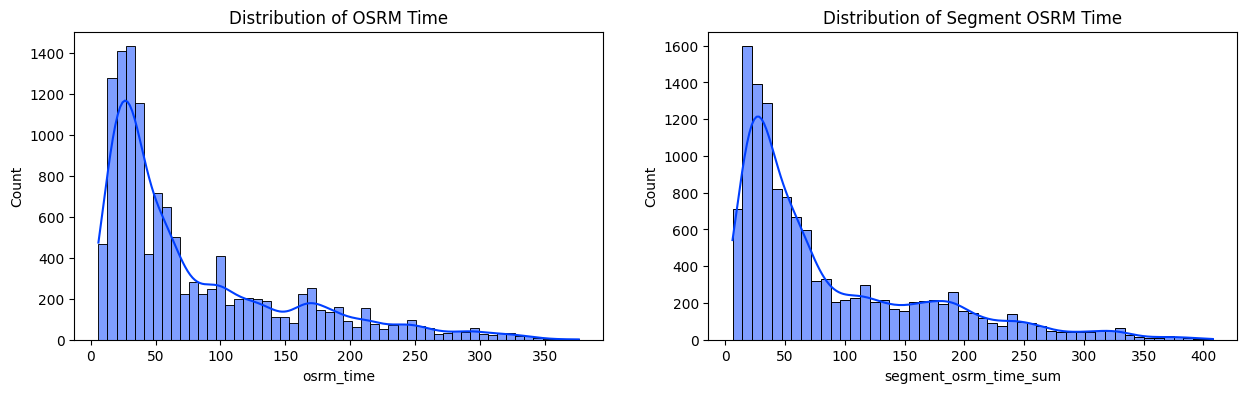

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(osrm_time,kde=True)
plt.title('Distribution of OSRM Time')

plt.subplot(2,2,2)
sns.histplot(segment_osrm_time_sum,kde=True)
plt.title('Distribution of Segment OSRM Time')

plt.subplots_adjust(hspace=0.5)



plt.show()


In [ ]:
 #@title Normalization check using QQ-Plots

<Figure size 1500x1000 with 0 Axes>

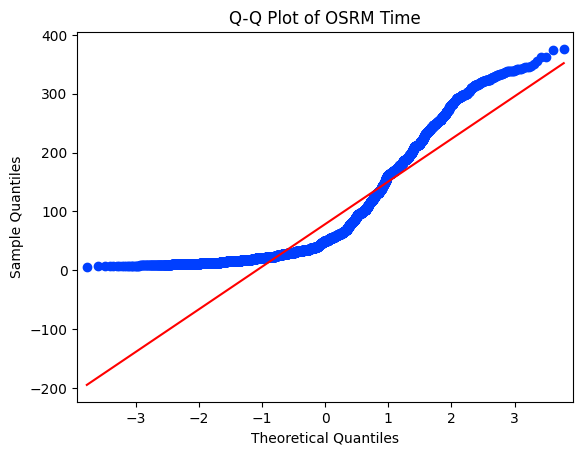

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(osrm_time,dist=norm,line="s")
plt.title('Q-Q Plot of OSRM Time')

plt.show()


<Figure size 1500x1000 with 0 Axes>

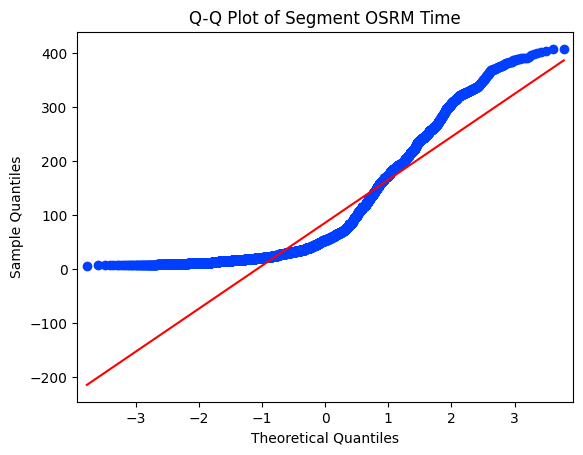

In [ ]:
plt.figure(figsize=(15,10))

sm.qqplot(segment_osrm_time_sum,dist=norm,line="s")
plt.title('Q-Q Plot of Segment OSRM Time')

plt.show()

In [ ]:
#@title Shapiro-Wilk Test

In [ ]:
s_stat1,spvalue1=shapiro(osrm_time)
s_stat2,spvalue2=shapiro(segment_osrm_time_sum)

In [ ]:
for i in [spvalue1,spvalue2]:
  if i<0.05:
    print("Distribution is Not Normal")
  else:
    print("Distribution is Normal")

Distribution is Not Normal
Distribution is Not Normal


In [ ]:
#@title Levene's test

In [ ]:
l_stat,l_pvalue=levene(osrm_time,segment_osrm_time_sum)

In [ ]:
if l_pvalue<0.05:
  print("Variance is Not Equal")
else:
  print("Variance is Equal")

Variance is Not Equal


In [ ]:
s_stat1,spvalue1=shapiro(osrm_time)
s_stat2,spvalue2=shapiro(segment_osrm_time_sum)

In [ ]:
if spvalue1<0.05:
  print("Distribution is Not Normal")
else:
  print("Distribution is Normal")

Distribution is Not Normal


In [ ]:
#setting Null and Alternate Hypothesis
H0="The Aggregated OSRM time & the Aggregated Segment OSRM time have same Mean values."
H1="The Aggregated OSRM time & the Aggregated Segment OSRM time do not have same Mean values."

In [ ]:
#@title Mann-Whitney U Test

In [ ]:
mstat, p_value = mannwhitneyu(osrm_time, segment_osrm_time_sum)
p_value

3.7243838320849166e-10

In [ ]:
if p_value<0.05:
  print("Reject Null Hypothesis-",H0)
else:
  print("Failed to reject Null Hypothesis-",H1)

Reject Null Hypothesis- The Aggregated OSRM time & the Aggregated Segment OSRM time have same Mean values.


With 95% confidence we can say that the mean values of the Aggregated OSRM Ttime & the Aggregated Segment OSRM Time are similar.

###6. Source and destnation based Analysis


In [ ]:
#checking for Source and destinations of most orders

In [ ]:
trip_agg_df['source_name'].value_counts().head(10)

source_name
Gurgaon_Bilaspur_HB (Haryana)        1052
Bhiwandi_Mankoli_HB (Maharashtra)     697
Bangalore_Nelmngla_H (Karnataka)      624
Bengaluru_Bomsndra_HB (Karnataka)     455
Pune_Tathawde_H (Maharashtra)         396
Mumbai Hub (Maharashtra)              300
Bengaluru_KGAirprt_HB (Karnataka)     295
Hyderabad_Shamshbd_H (Telangana)      278
Kolkata_Dankuni_HB (West Bengal)      245
Delhi_Airport_H (Delhi)               234
Name: count, dtype: int64

In [ ]:
trip_agg_df['destination_name'].value_counts().head(10)

destination_name
Gurgaon_Bilaspur_HB (Haryana)        745
Bangalore_Nelmngla_H (Karnataka)     558
Bhiwandi_Mankoli_HB (Maharashtra)    535
Bengaluru_Bomsndra_HB (Karnataka)    314
Hyderabad_Shamshbd_H (Telangana)     305
Chandigarh_Mehmdpur_H (Punjab)       286
Bengaluru_KGAirprt_HB (Karnataka)    272
Mumbai Hub (Maharashtra)             234
Sonipat_Kundli_H (Haryana)           229
Pune_Tathawde_H (Maharashtra)        228
Name: count, dtype: int64

In [ ]:
trip_agg_df['source_state'].value_counts().head(10)

source_state
Maharashtra      2714
Karnataka        2143
Haryana          1823
Tamil Nadu       1039
Telangana         784
Uttar Pradesh     760
Gujarat           750
Delhi             725
West Bengal       665
Punjab            536
Name: count, dtype: int64

In [ ]:
trip_agg_df['destination_state'].value_counts().head(10)

destination_state
Maharashtra      2569
Karnataka        2263
Haryana          1527
Tamil Nadu       1045
Uttar Pradesh     822
Telangana         815
Gujarat           756
West Bengal       676
Delhi             642
Punjab            585
Name: count, dtype: int64

In [ ]:
trip_agg_df['source_city'].value_counts().head(10)

source_city
Gurgaon      1128
Bengaluru    1052
Mumbai        968
Bhiwandi      697
Bangalore     648
Delhi         548
Hyderabad     515
Pune          480
Chennai       338
Kolkata       281
Name: count, dtype: int64

In [ ]:
trip_agg_df['destination_city'].value_counts().head(10)

destination_city
Mumbai        1084
Bengaluru     1075
Gurgaon        801
Bhiwandi       566
Bangalore      558
Delhi          528
Hyderabad      508
Chennai        391
Chandigarh     357
Pune           293
Name: count, dtype: int64

In [ ]:
trip_agg_df['source_place'].value_counts().head(10)

source_place
Bilaspur_HB    1052
Hub             712
Mankoli_HB      697
Nelmngla_H      624
Bomsndra_HB     455
Tathawde_H      396
DC              304
KGAirprt_HB     295
Shamshbd_H      278
Dankuni_HB      245
Name: count, dtype: int64

In [ ]:
trip_agg_df['destination_place'].value_counts().head(10)

destination_place
Bilaspur_HB    745
Nelmngla_H     558
Hub            555
Mankoli_HB     535
DC             364
Bomsndra_HB    314
Shamshbd_H     305
               293
Mehmdpur_H     286
KGAirprt_HB    272
Name: count, dtype: int64

In [ ]:
trip_agg_df['Src_to_Dest_Corridor'].value_counts().head(10)

Src_to_Dest_Corridor
Bangalore_Nelmngla_H (Karnataka)<--->Bengaluru_KGAirprt_HB (Karnataka)     151
Bengaluru_Bomsndra_HB (Karnataka)<--->Bengaluru_KGAirprt_HB (Karnataka)    121
Bengaluru_KGAirprt_HB (Karnataka)<--->Bangalore_Nelmngla_H (Karnataka)     108
Pune_Tathawde_H (Maharashtra)<--->Bhiwandi_Mankoli_HB (Maharashtra)        107
Bhiwandi_Mankoli_HB (Maharashtra)<--->Mumbai Hub (Maharashtra)             105
Bangalore_Nelmngla_H (Karnataka)<--->Bengaluru_Bomsndra_HB (Karnataka)     100
Mumbai_Chndivli_PC (Maharashtra)<--->Bhiwandi_Mankoli_HB (Maharashtra)      99
Bengaluru_Bomsndra_HB (Karnataka)<--->Bangalore_Nelmngla_H (Karnataka)      93
Gurgaon_Bilaspur_HB (Haryana)<--->Sonipat_Kundli_H (Haryana)                92
Bengaluru_KGAirprt_HB (Karnataka)<--->Bengaluru_Bomsndra_HB (Karnataka)     86
Name: count, dtype: int64

In [ ]:
trip_agg_df['State_corridor'].value_counts().head(10)

State_corridor
Maharashtra_Mumbai<--->Maharashtra_Mumbai      557
Karnataka_Bengaluru<--->Karnataka_Bengaluru    528
Karnataka_Bangalore<--->Karnataka_Bengaluru    458
Maharashtra_Bhiwandi<--->Maharashtra_Mumbai    437
Karnataka_Bengaluru<--->Karnataka_Bangalore    347
Maharashtra_Mumbai<--->Maharashtra_Bhiwandi    345
Telangana_Hyderabad<--->Telangana_Hyderabad    308
Haryana_Gurgaon<--->Delhi_Delhi                237
Tamil Nadu_Chennai<--->Tamil Nadu_Chennai      200
Delhi_Delhi<--->Haryana_Gurgaon                183
Name: count, dtype: int64

In [ ]:
trip_agg_df['City_corridor'].value_counts().head(10)

City_corridor
Bangalore_Nelmngla_H<--->Bengaluru_KGAirprt_HB     151
Bengaluru_Bomsndra_HB<--->Bengaluru_KGAirprt_HB    121
Bengaluru_KGAirprt_HB<--->Bangalore_Nelmngla_H     108
Pune_Tathawde_H<--->Bhiwandi_Mankoli_HB            107
Bhiwandi_Mankoli_HB<--->Mumbai_Hub                 105
Bangalore_Nelmngla_H<--->Bengaluru_Bomsndra_HB     100
Mumbai_Chndivli_PC<--->Bhiwandi_Mankoli_HB          99
Bengaluru_Bomsndra_HB<--->Bangalore_Nelmngla_H      93
Gurgaon_Bilaspur_HB<--->Sonipat_Kundli_H            92
Bengaluru_KGAirprt_HB<--->Bengaluru_Bomsndra_HB     86
Name: count, dtype: int64

In [ ]:
# To find the busiest corridor, we'll look at the most common Source to Destination Corridors
corridor_counts = trip_agg_df.groupby(['Src_to_Dest_Corridor']).size().reset_index(name='count')
busiest_corridor = corridor_counts.sort_values(by='count', ascending=False).head(5)

busiest_corridor_details = busiest_corridor.merge(trip_agg_df, on=['Src_to_Dest_Corridor'])
average_distance = busiest_corridor_details['actual_distance_to_destination'].mean()
average_time = busiest_corridor_details['od_time_diff_hour'].mean()
table=True
print("Busiest corridor:  ")
display(busiest_corridor)
print("Average distance:  ",round(average_distance,2),"Kms")
print("Average time (in hours):  ",round(average_time,2),"Hrs")

Busiest corridor:  


Src_to_Dest_Corridor  count
136    Bangalore_Nelmngla_H (Karnataka)<--->Bengaluru_KGAirprt_HB (Karnataka)    151
195   Bengaluru_Bomsndra_HB (Karnataka)<--->Bengaluru_KGAirprt_HB (Karnataka)    121
209    Bengaluru_KGAirprt_HB (Karnataka)<--->Bangalore_Nelmngla_H (Karnataka)    108
1409      Pune_Tathawde_H (Maharashtra)<--->Bhiwandi_Mankoli_HB (Maharashtra)    107
271            Bhiwandi_Mankoli_HB (Maharashtra)<--->Mumbai Hub (Maharashtra)    105

Average distance:   87.53 Kms
Average time (in hours):   5.07 Hrs


#### Insights

-  `Gurgaon` is the Most frequent Source City while `Mumbai` is the most frequent Destination City.
- `Maharashtra` is the biggest State in terms of both sources and destinations followed by `Karnataka`.
- All of the Top 5 busiest corridors reside in `Karnataka` and `Maharashtra` with an average distance of 87 Kms between them taking 5 hrs for commute on an average.

## Buisness Insights

**Based on EDA:**

* The Timeframe of the data is '2018-09-12' to '2018-10-08' i.e(26 days).
* 88% of the trips are from September Month & remaining are from Otober
* The entire data is heavily right skewed
* Almost all the features are heavily positively correleated with each other.

**Route type:**

- The analysis reveals that a bigger proportion of shipments are routed through Full Truck Load (FTL) which produces efficiency and speeder delivery process.

**Geographical Focus:**

Understanding the busiest routes and distances can help in optimizing logistics operations, improving transportation efficiency, and potentially reducing costs.

- **State:** The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these regions.

- **source city:** Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, suggesting that these cities play a crucial role in contributing to the overall business operations or transportation activities.

- **Destination city:** Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.

- **Busiest corridor:** Overall, the busiest corridor is Mumbai_Maharashtra and Bangalore_Karnataka which has the maximum trips.
    - Average distance:   87.53 Kms
    - Average time:   5.07 Hrs

**Delivery Time & Distance Accuracy:**

**OSRM Time vs. Actual Time:**
- The difference between the mean values of estimated delivery time and actual delivery time suggests that there may be variations or delays in the actual delivery process compared to the initial estimates.
- The fact that the mean of OSRM time is less than the mean of actual delivery time indicates that the estimated times provided by the OSRM (Open Source Routing Machine) service tend to be optimistic.

**OSRM Distance vs. Actual Distance:**
- The mean of OSRM distance being greater than the mean of actual distance to the destination suggests that the OSRM might overestimate the distances. This could impact route planning and fuel efficiency calculations.

**Segment-wise time Analysis:**
- The equality in the mean values of actual time and segment actual time suggests that the time measurements are consistent across different segments of the delivery process

**Segment-wise distance Analysis:**
- The mean of segment OSRM distance being greater than the mean of OSRM distance implies that the OSRM might provide more conservative estimates for distance within individual segments.

## Recommendations

**Operational Efficiency:**
- Implement advanced demand forecasting techniques to anticipate peak travel times and adjust transportation services accordingly. This proactive approach can help in better resource allocation and minimize the impact of congestion during peak hours.

- Overall, the analysis hints at potential areas for operational improvement. Businesses could focus on refining their route planning algorithms, addressing discrepancies in estimated times and distances, and streamlining processes between different stages of delivery to enhance overall operational efficiency.


**Customer profiling:**
- Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.


**Cost Optimization:**
   - Differences in the Actual and estimated values of time and distance could be bought much closer to get clearer picture of operational costs and expected profit margins.

**Strategic planning:**
  - FTL can be preferred over Carting startegiocally and reduce operational cost and bring in speedy deliveries.
  - Adding more packages in a single Order can also help make the operational model much linear.

**Route Optimization:**

   - Since the busiest of routes are inside Karnataka and Maharashtara, focus on transportation network in these corridors could help in decongestion and more efficient and cheaper transportational costs.
   - City Specific  strategies with special focus busiest of the cities could be the need of the hour.

**Stakeholder Involvement**

  - Take frequent surveys and feedbcks from customers and other stakeholders to improve strategic and operational efficiency which could help more optimal business model.



